In [1]:
from os import sys
import os
sys.path.append('../../')

# Getting packages #
%matplotlib widget

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import main

import plotly.express as px

# import main
import propellers
import motors
from aircraft import airplane
import cl_finders

# Setting Plot Defaults
plt.style.use('../../basic_plotter.mplstyle')

In [2]:
### Definining name of analysis ###
name = 'thesis_steady_results_MS4525'

# figure_path = "/Users/williamkemp/Dropbox/Apps/Overleaf/Thesis_Draft_01/Figures/"
figure_path = '../Figures/'+name+'/'
if not os.path.exists(figure_path):
    os.makedirs(figure_path)


In [3]:
# Importing Drag Build Ups
build_turbulent = pd.read_pickle("../../DragBuilds/CREATeV_DragBuildTurbulent.pkl")
build_laminar = pd.read_pickle("../../DragBuilds/CREATeV_DragBuildLaminar.pkl")

In [4]:
path_1 = '../Results/2021-08-04_Cruise_Analysis_Cleaned_MS4525/'
path_2 = '../Results/2022-06-13_CREATeV_Cruise_2022-04-30_Analysis_Cleaned_MS4525/'
path_3 = '../Results/2022-06-15_CREATeV_Cruise_Analysis_Cleaned_MS4525_realfreewheel/'
path_4 = '../Results/2023-07-06_CREATeV_Cruise_Analysis_Cleaned_MS4525/'

In [5]:
mass = 12.6 # Estimated with virtual bolt included
span = 6.28
chord = 0.395
createv = airplane(mass, chord, span)

In [6]:
# All Cruise Results Manually Segmented

ct_cruise_segresult_2021 = pd.read_pickle(path_1+'ct_cruise_segresult.pkl')
eta_cruise_segresult_2021 = pd.read_pickle(path_1+'eta_cruise_segresult.pkl')

ct_cruise_segresult_2022_06_13 = pd.read_pickle(path_2+'ct_cruise_segresult.pkl')
eta_cruise_segresult_2022_06_13 = pd.read_pickle(path_2+'eta_cruise_segresult.pkl')

ct_cruise_segresult_2022_06_15 = pd.read_pickle(path_3+'ct_cruise_segresult.pkl')
eta_cruise_segresult_2022_06_15 = pd.read_pickle(path_3+'eta_cruise_segresult.pkl')

ct_cruise_segresult_2023 = pd.read_pickle(path_4+'ct_cruise_segresult.pkl')
eta_cruise_segresult_2023 = pd.read_pickle(path_4+'eta_cruise_segresult.pkl')

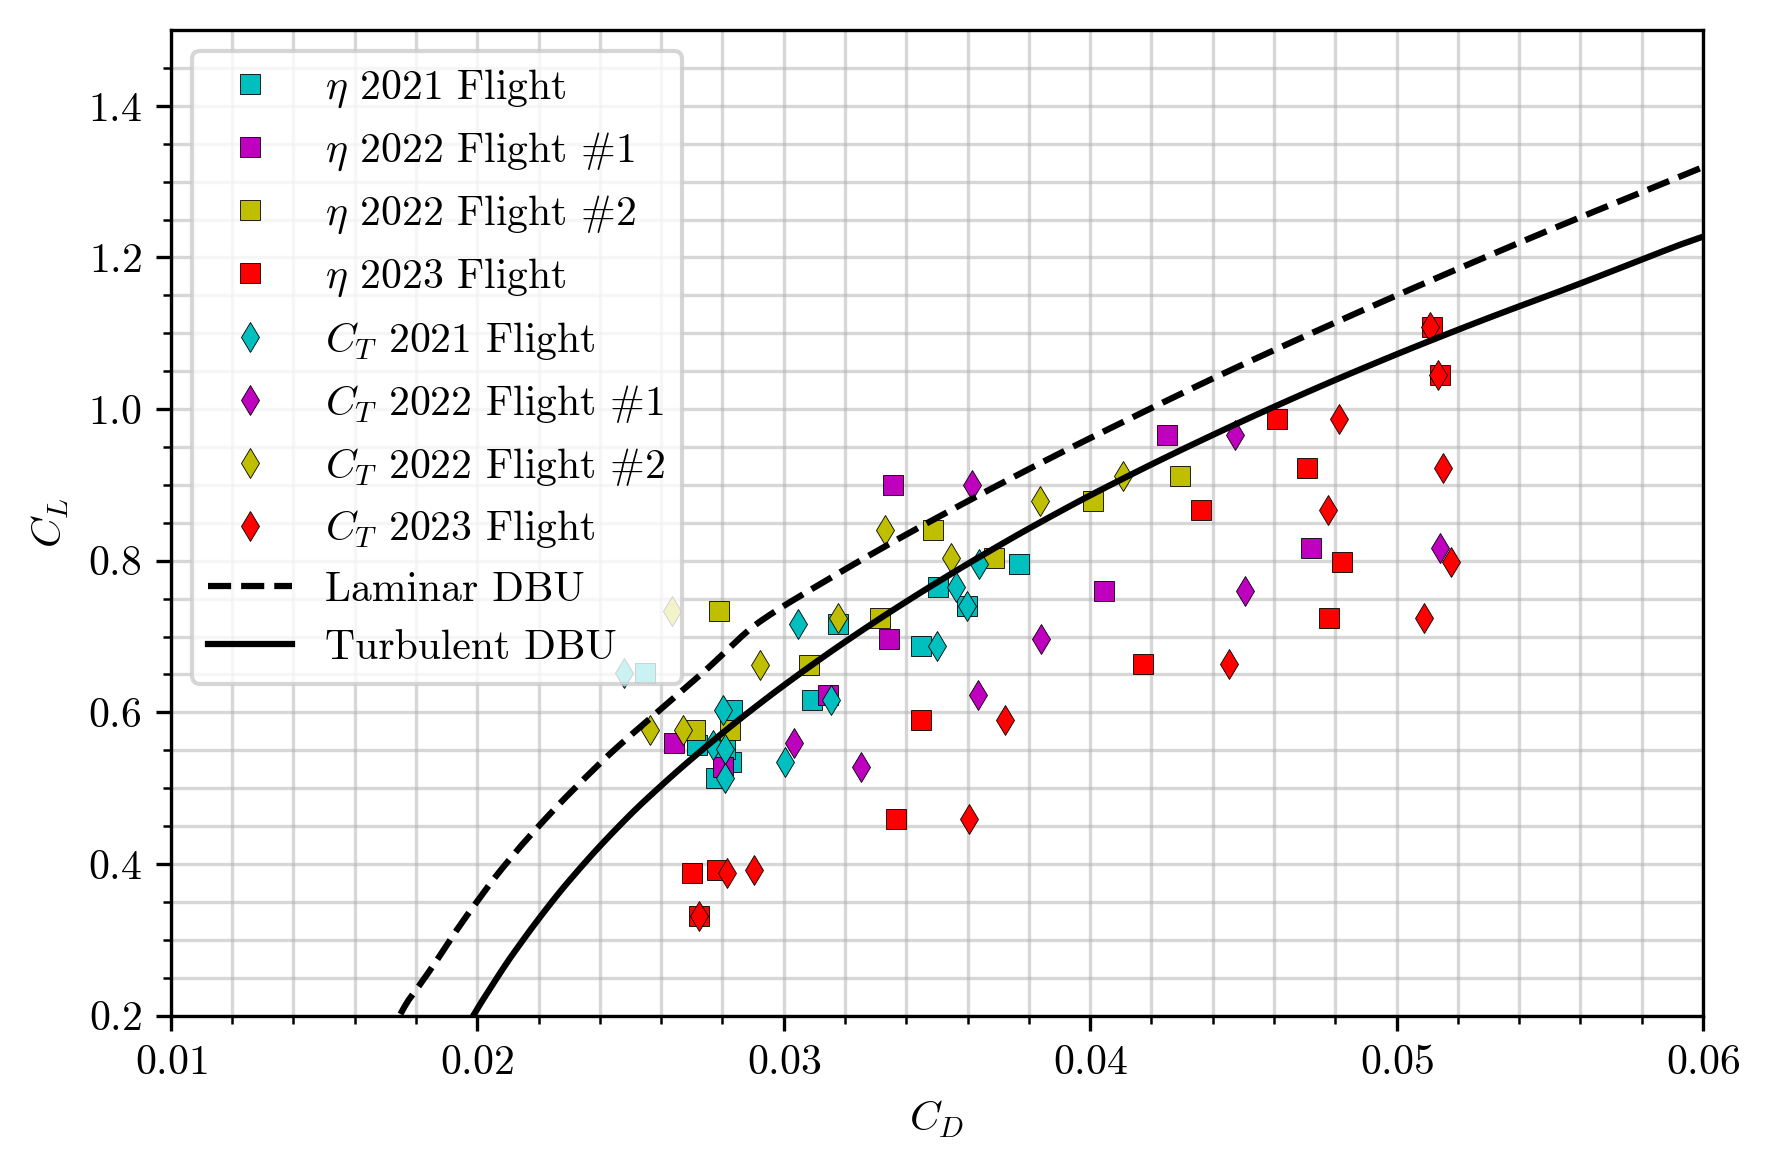

In [7]:
polar_cruise_comparison_raw = plt.figure(dpi=300, figsize=(6,4))

plt.plot(eta_cruise_segresult_2021.ave_polar.CD, eta_cruise_segresult_2021.ave_polar.CL, marker='s', markersize=5, color='c', linestyle='', label="$\eta$ 2021 Flight")

plt.plot(eta_cruise_segresult_2022_06_13.ave_polar.CD, eta_cruise_segresult_2022_06_13.ave_polar.CL, marker='s', markersize=5, color='m', linestyle='', label="$\eta$ 2022 Flight #1")

plt.plot(eta_cruise_segresult_2022_06_15.ave_polar.CD, eta_cruise_segresult_2022_06_15.ave_polar.CL, marker='s', markersize=5, color='y', linestyle='', label="$\eta$ 2022 Flight #2")

plt.plot(eta_cruise_segresult_2023.ave_polar.CD, eta_cruise_segresult_2023.ave_polar.CL, marker='s', markersize=5, color='r', linestyle='', label="$\eta$ 2023 Flight")

plt.plot(ct_cruise_segresult_2021.ave_polar.CD, ct_cruise_segresult_2021.ave_polar.CL, marker='d', markersize=5, color='c', linestyle='', label="$C_T$ 2021 Flight")

plt.plot(ct_cruise_segresult_2022_06_13.ave_polar.CD, ct_cruise_segresult_2022_06_13.ave_polar.CL, marker='d', markersize=5, color='m', linestyle='', label="$C_T$ 2022 Flight #1")

plt.plot(ct_cruise_segresult_2022_06_15.ave_polar.CD, ct_cruise_segresult_2022_06_15.ave_polar.CL, marker='d', markersize=5, color='y', linestyle='', label="$C_T$ 2022 Flight #2")

plt.plot(ct_cruise_segresult_2023.ave_polar.CD, ct_cruise_segresult_2023.ave_polar.CL, marker='d', markersize=5, color='r', linestyle='', label="$C_T$ 2023 Flight")

plt.plot(build_laminar.CD, build_laminar.CL, linestyle="--", marker="", color="black", label='Laminar DBU')
plt.plot(build_turbulent.CD, build_turbulent.CL, linestyle="solid", marker="", color="black", label='Turbulent DBU')

plt.legend(ncol=1, loc='upper left', fancybox=True)
plt.xlabel("$C_D$")
plt.ylabel("$C_L$")
plt.xlim([0.01, 0.06])
plt.ylim([0.2, 1.5])
plt.show()

main.save_figure(polar_cruise_comparison_raw, f'{polar_cruise_comparison_raw=}'.split('=')[0], figure_path, overwrite=True)

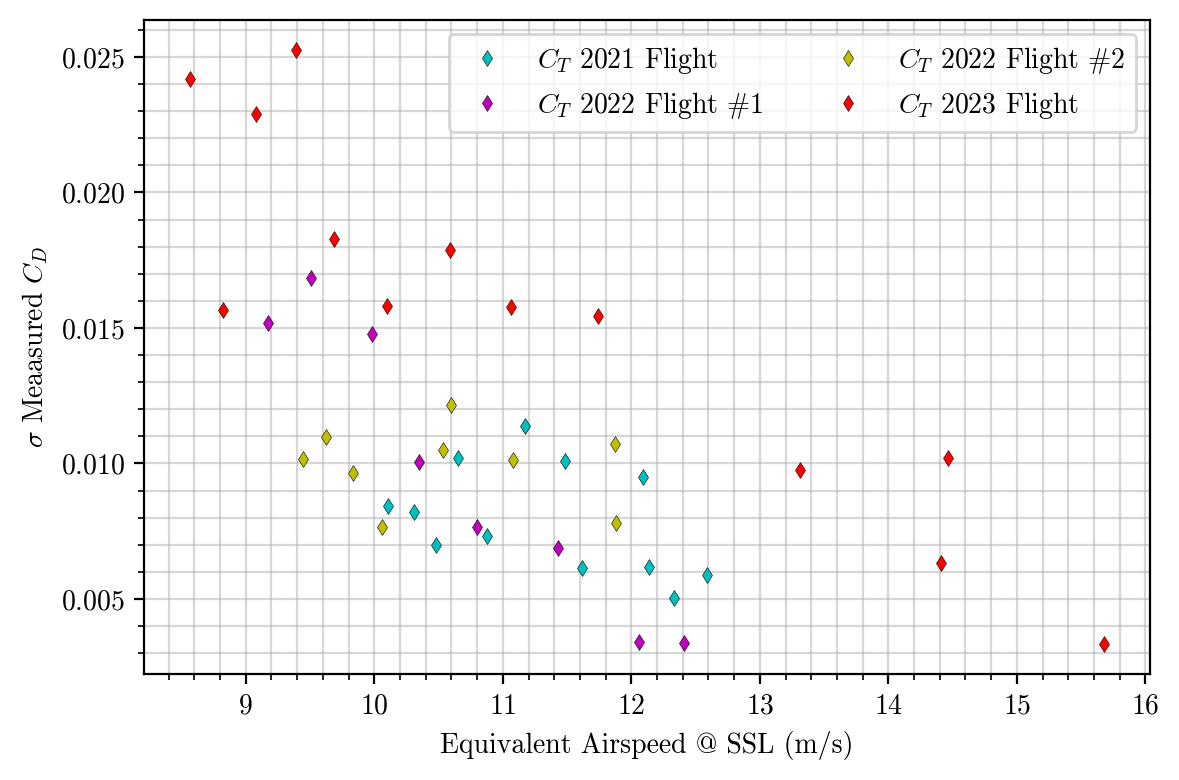

In [8]:
# Getting Power Required from CL, CD
[Preq_ct, EAS_ct] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2022_06_15.ave_polar.CL , ct_cruise_segresult_2022_06_15.ave_polar.CD)
[Preq_XFLR5_Turbulent, EAS_XFLR5_Turbulent] = cl_finders.rawpolar2preqew(createv, build_turbulent.CL, build_turbulent.CD)
[Preq_XFLR5_Laminar, EAS_XFLR5_Laminar] = cl_finders.rawpolar2preqew(createv, build_laminar.CL, build_laminar.CD)

# Plotting
preq_cruise_comparison_raw = plt.figure(dpi=200, figsize=(6,4))

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2021.ave_polar.CL , ct_cruise_segresult_2021.ave_polar.CD)
plt.plot(EAS, ct_cruise_segresult_2021.std_polar.CD, linestyle='', marker='d', color='c', label="$C_T$ 2021 Flight")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2022_06_13.ave_polar.CL , ct_cruise_segresult_2022_06_13.ave_polar.CD)
plt.plot(EAS, ct_cruise_segresult_2022_06_13.std_polar.CD, linestyle='', marker='d', color='m', label="$C_T$ 2022 Flight #1")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2022_06_15.ave_polar.CL , ct_cruise_segresult_2022_06_15.ave_polar.CD)
plt.plot(EAS, ct_cruise_segresult_2022_06_15.std_polar.CD, linestyle='', marker='d', color='y', label="$C_T$ 2022 Flight #2")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2023.ave_polar.CL , ct_cruise_segresult_2023.ave_polar.CD)
plt.plot(EAS, ct_cruise_segresult_2023.std_polar.CD, linestyle='', marker='d', color='r', label="$C_T$ 2023 Flight")

plt.xlabel("Equivalent Airspeed @ SSL (m/s)")
plt.ylabel("$\sigma$ Meaasured $C_D$")
plt.legend(ncol=2, loc='best', fancybox=True)
plt.show()
# main.save_figure(preq_cruise_comparison_raw, f'{preq_cruise_comparison_raw=}'.split('=')[0], figure_path, overwrite=True)

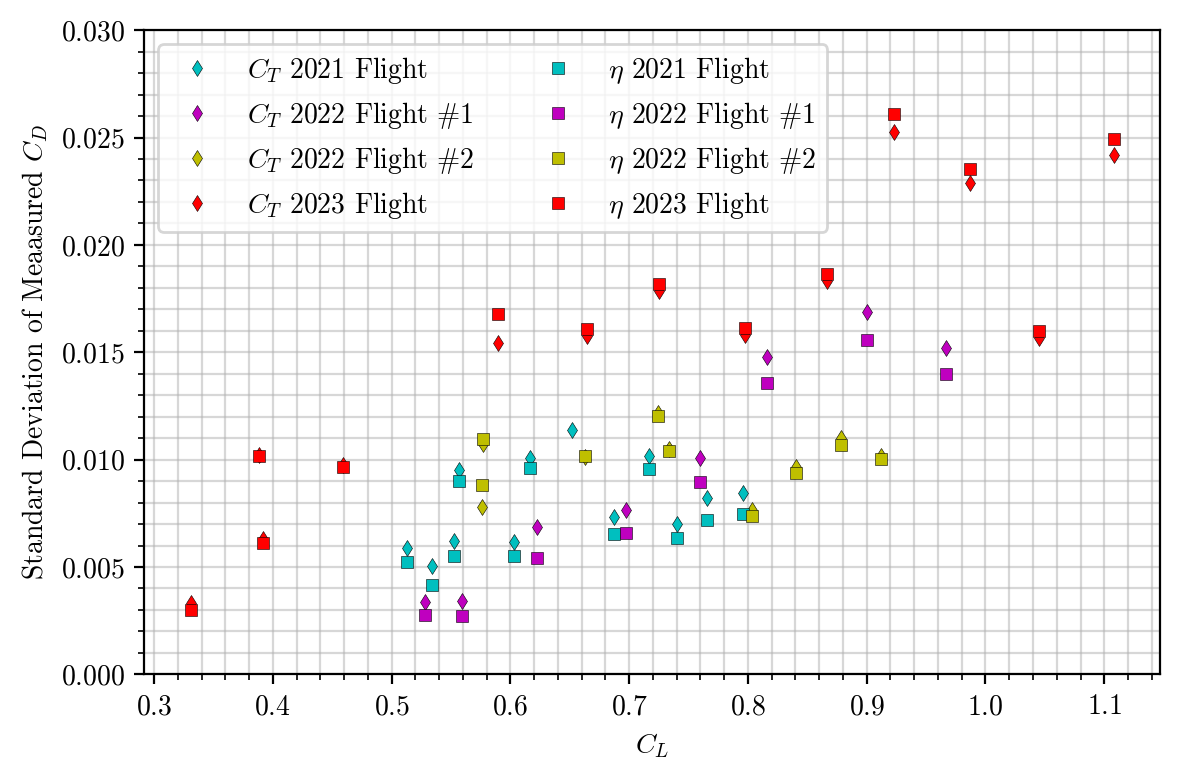

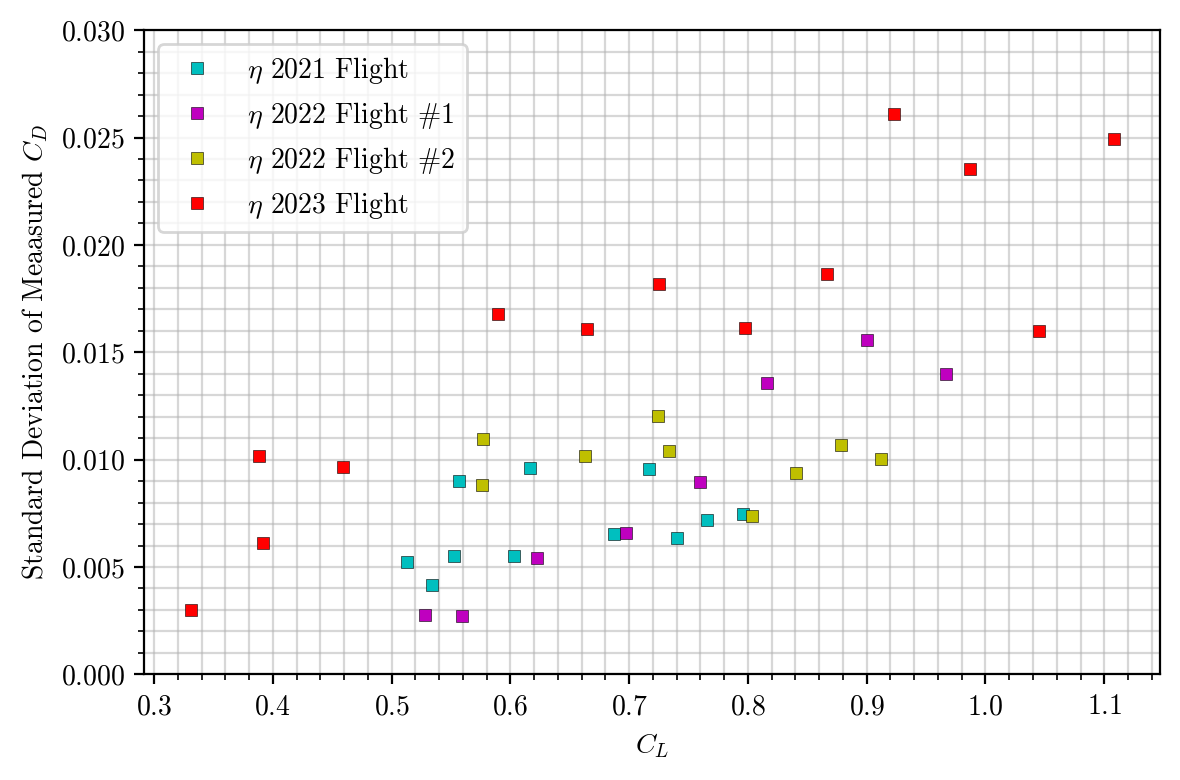

In [9]:
# Getting Power Required from CL, CD
[Preq_ct, EAS_ct] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2022_06_15.ave_polar.CL , ct_cruise_segresult_2022_06_15.ave_polar.CD)
[Preq_XFLR5_Turbulent, EAS_XFLR5_Turbulent] = cl_finders.rawpolar2preqew(createv, build_turbulent.CL, build_turbulent.CD)
[Preq_XFLR5_Laminar, EAS_XFLR5_Laminar] = cl_finders.rawpolar2preqew(createv, build_laminar.CL, build_laminar.CD)

# Plotting
preq_cruise_comparison_raw = plt.figure(dpi=200, figsize=(6,4))

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2021.ave_polar.CL , ct_cruise_segresult_2021.ave_polar.CD)
plt.plot(ct_cruise_segresult_2021.ave_polar.CL, ct_cruise_segresult_2021.std_polar.CD, linestyle='', marker='d', color='c', label="$C_T$ 2021 Flight")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2022_06_13.ave_polar.CL , ct_cruise_segresult_2022_06_13.ave_polar.CD)
plt.plot(ct_cruise_segresult_2022_06_13.ave_polar.CL, ct_cruise_segresult_2022_06_13.std_polar.CD, linestyle='', marker='d', color='m', label="$C_T$ 2022 Flight #1")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2022_06_15.ave_polar.CL , ct_cruise_segresult_2022_06_15.ave_polar.CD)
plt.plot(ct_cruise_segresult_2022_06_15.ave_polar.CL, ct_cruise_segresult_2022_06_15.std_polar.CD, linestyle='', marker='d', color='y', label="$C_T$ 2022 Flight #2")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2023.ave_polar.CL , ct_cruise_segresult_2023.ave_polar.CD)
plt.plot(ct_cruise_segresult_2023.ave_polar.CL, ct_cruise_segresult_2023.std_polar.CD, linestyle='', marker='d', color='r', label="$C_T$ 2023 Flight")

##
[Preq, EAS] = cl_finders.rawpolar2preqew(createv, eta_cruise_segresult_2021.ave_polar.CL , eta_cruise_segresult_2021.ave_polar.CD)
plt.plot(eta_cruise_segresult_2021.ave_polar.CL, eta_cruise_segresult_2021.std_polar.CD, linestyle='', marker='s', color='c', label="$\eta$ 2021 Flight")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, eta_cruise_segresult_2022_06_13.ave_polar.CL , eta_cruise_segresult_2022_06_13.ave_polar.CD)
plt.plot(eta_cruise_segresult_2022_06_13.ave_polar.CL, eta_cruise_segresult_2022_06_13.std_polar.CD, linestyle='', marker='s', color='m', label="$\eta$ 2022 Flight #1")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, eta_cruise_segresult_2022_06_15.ave_polar.CL , eta_cruise_segresult_2022_06_15.ave_polar.CD)
plt.plot(eta_cruise_segresult_2022_06_15.ave_polar.CL, eta_cruise_segresult_2022_06_15.std_polar.CD, linestyle='', marker='s', color='y', label="$\eta$ 2022 Flight #2")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, eta_cruise_segresult_2023.ave_polar.CL , eta_cruise_segresult_2023.ave_polar.CD)
plt.plot(eta_cruise_segresult_2023.ave_polar.CL, eta_cruise_segresult_2023.std_polar.CD, linestyle='', marker='s', color='r', label="$\eta$ 2023 Flight")
##

plt.xlabel("$C_L$")
plt.ylabel("Standard Deviation of Meaasured $C_D$")
plt.ylim([0,0.03])
plt.legend(ncol=2, loc='best')
plt.show()
# main.save_figure(preq_cruise_comparison_raw, f'{preq_cruise_comparison_raw=}'.split('=')[0], figure_path, overwrite=True)

# Plotting
preq_cruise_comparison_raw = plt.figure(dpi=200, figsize=(6,4))

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, eta_cruise_segresult_2021.ave_polar.CL , eta_cruise_segresult_2021.ave_polar.CD)
plt.plot(eta_cruise_segresult_2021.ave_polar.CL, eta_cruise_segresult_2021.std_polar.CD, linestyle='', marker='s', color='c', label="$\eta$ 2021 Flight")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, eta_cruise_segresult_2022_06_13.ave_polar.CL , eta_cruise_segresult_2022_06_13.ave_polar.CD)
plt.plot(eta_cruise_segresult_2022_06_13.ave_polar.CL, eta_cruise_segresult_2022_06_13.std_polar.CD, linestyle='', marker='s', color='m', label="$\eta$ 2022 Flight #1")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, eta_cruise_segresult_2022_06_15.ave_polar.CL , eta_cruise_segresult_2022_06_15.ave_polar.CD)
plt.plot(eta_cruise_segresult_2022_06_15.ave_polar.CL, eta_cruise_segresult_2022_06_15.std_polar.CD, linestyle='', marker='s', color='y', label="$\eta$ 2022 Flight #2")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, eta_cruise_segresult_2023.ave_polar.CL , eta_cruise_segresult_2023.ave_polar.CD)
plt.plot(eta_cruise_segresult_2023.ave_polar.CL, eta_cruise_segresult_2023.std_polar.CD, linestyle='', marker='s', color='r', label="$\eta$ 2023 Flight")

plt.xlabel("$C_L$")
plt.ylabel("Standard Deviation of Meaasured $C_D$")
plt.ylim([0,0.03])
plt.legend(ncol=1, loc='best')
plt.show()
# main.save_figure(preq_cruise_comparison_raw, f'{preq_cruise_comparison_raw=}'.split('=')[0], figure_path, overwrite=True)

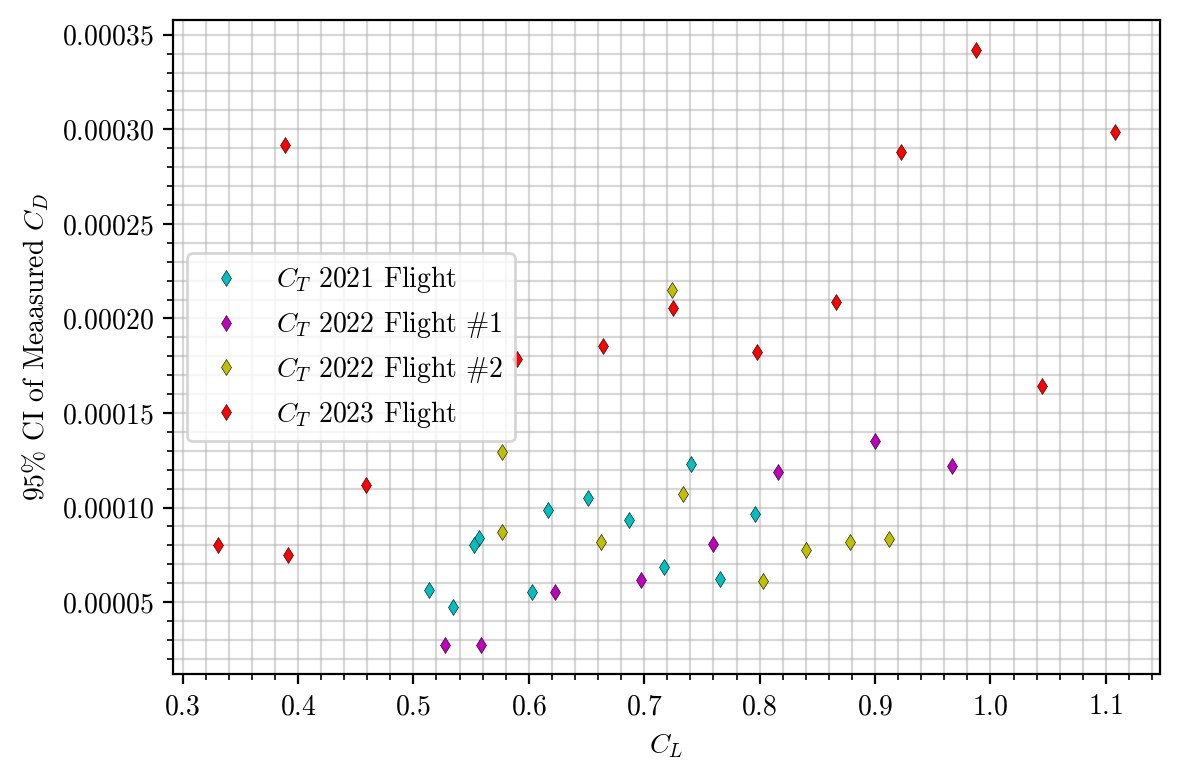

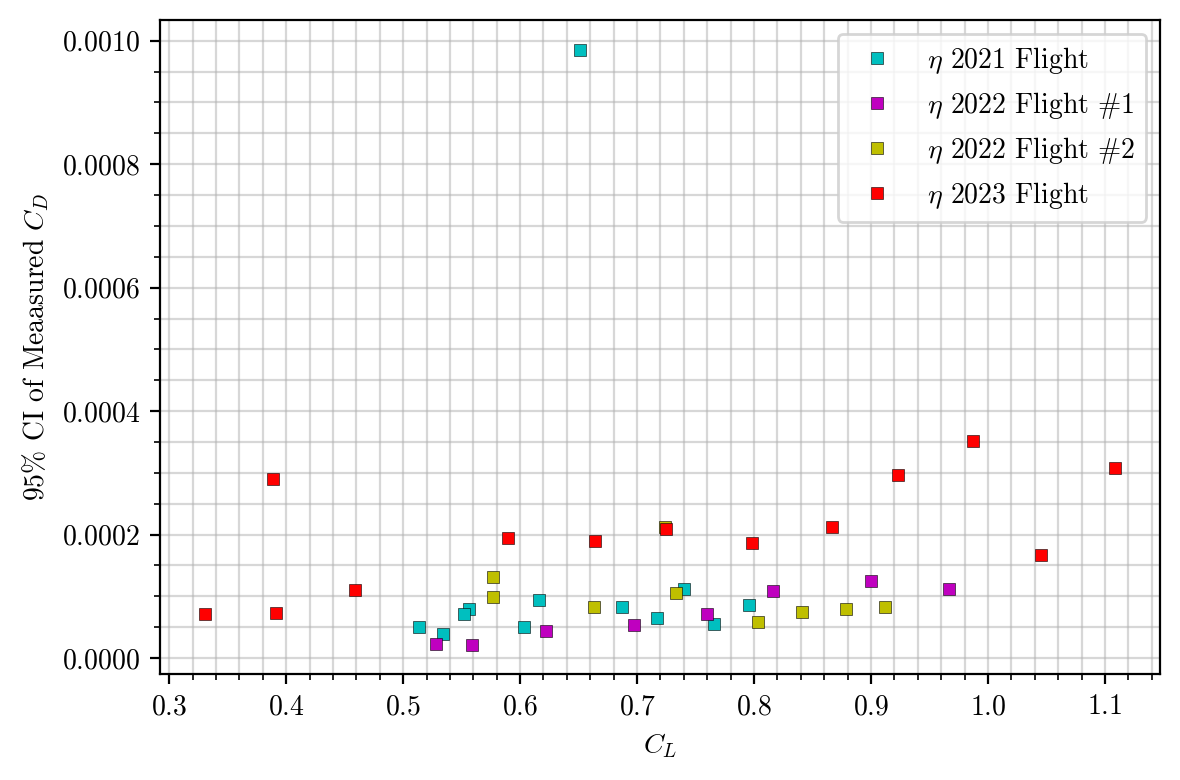

In [10]:
# Getting Power Required from CL, CD
[Preq_ct, EAS_ct] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2022_06_15.ave_polar.CL , ct_cruise_segresult_2022_06_15.ave_polar.CD)
[Preq_XFLR5_Turbulent, EAS_XFLR5_Turbulent] = cl_finders.rawpolar2preqew(createv, build_turbulent.CL, build_turbulent.CD)
[Preq_XFLR5_Laminar, EAS_XFLR5_Laminar] = cl_finders.rawpolar2preqew(createv, build_laminar.CL, build_laminar.CD)

# Plotting
preq_cruise_comparison_raw = plt.figure(dpi=200, figsize=(6,4))

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2021.ave_polar.CL , ct_cruise_segresult_2021.ave_polar.CD)
plt.plot(ct_cruise_segresult_2021.ave_polar.CL, ct_cruise_segresult_2021.ci95_polar.CD, linestyle='', marker='d', color='c', label="$C_T$ 2021 Flight")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2022_06_13.ave_polar.CL , ct_cruise_segresult_2022_06_13.ave_polar.CD)
plt.plot(ct_cruise_segresult_2022_06_13.ave_polar.CL, ct_cruise_segresult_2022_06_13.ci95_polar.CD, linestyle='', marker='d', color='m', label="$C_T$ 2022 Flight #1")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2022_06_15.ave_polar.CL , ct_cruise_segresult_2022_06_15.ave_polar.CD)
plt.plot(ct_cruise_segresult_2022_06_15.ave_polar.CL, ct_cruise_segresult_2022_06_15.ci95_polar.CD, linestyle='', marker='d', color='y', label="$C_T$ 2022 Flight #2")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2023.ave_polar.CL , ct_cruise_segresult_2023.ave_polar.CD)
plt.plot(ct_cruise_segresult_2023.ave_polar.CL, ct_cruise_segresult_2023.ci95_polar.CD, linestyle='', marker='d', color='r', label="$C_T$ 2023 Flight")

plt.xlabel("$C_L$")
plt.ylabel("95% CI of Meaasured $C_D$")
plt.legend(ncol=1, loc='best')
plt.show()
# main.save_figure(preq_cruise_comparison_raw, f'{preq_cruise_comparison_raw=}'.split('=')[0], figure_path, overwrite=True)

# Plotting
preq_cruise_comparison_raw = plt.figure(dpi=200, figsize=(6, 4))

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, eta_cruise_segresult_2021.ave_polar.CL , eta_cruise_segresult_2021.ave_polar.CD)
plt.plot(eta_cruise_segresult_2021.ave_polar.CL, eta_cruise_segresult_2021.ci95_polar.CD, linestyle='', marker='s', color='c', label="$\eta$ 2021 Flight")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, eta_cruise_segresult_2022_06_13.ave_polar.CL , eta_cruise_segresult_2022_06_13.ave_polar.CD)
plt.plot(eta_cruise_segresult_2022_06_13.ave_polar.CL, eta_cruise_segresult_2022_06_13.ci95_polar.CD, linestyle='', marker='s', color='m', label="$\eta$ 2022 Flight #1")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, eta_cruise_segresult_2022_06_15.ave_polar.CL , eta_cruise_segresult_2022_06_15.ave_polar.CD)
plt.plot(eta_cruise_segresult_2022_06_15.ave_polar.CL, eta_cruise_segresult_2022_06_15.ci95_polar.CD, linestyle='', marker='s', color='y', label="$\eta$ 2022 Flight #2")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, eta_cruise_segresult_2023.ave_polar.CL , eta_cruise_segresult_2023.ave_polar.CD)
plt.plot(eta_cruise_segresult_2023.ave_polar.CL, eta_cruise_segresult_2023.ci95_polar.CD, linestyle='', marker='s', color='r', label="$\eta$ 2023 Flight")

plt.xlabel("$C_L$")
plt.ylabel("95% CI of Meaasured $C_D$")
plt.legend(ncol=1, loc='best')
plt.show()
# main.save_figure(preq_cruise_comparison_raw, f'{preq_cruise_comparison_raw=}'.split('=')[0], figure_path, overwrite=True)

In [11]:
# All Glide Results Manually Segmented

glide_segresult_2022 = pd.read_pickle(path_3+"desc_segresult.pkl")
print(glide_segresult_2022.fit_polar)

[0.01499254 0.60168775]


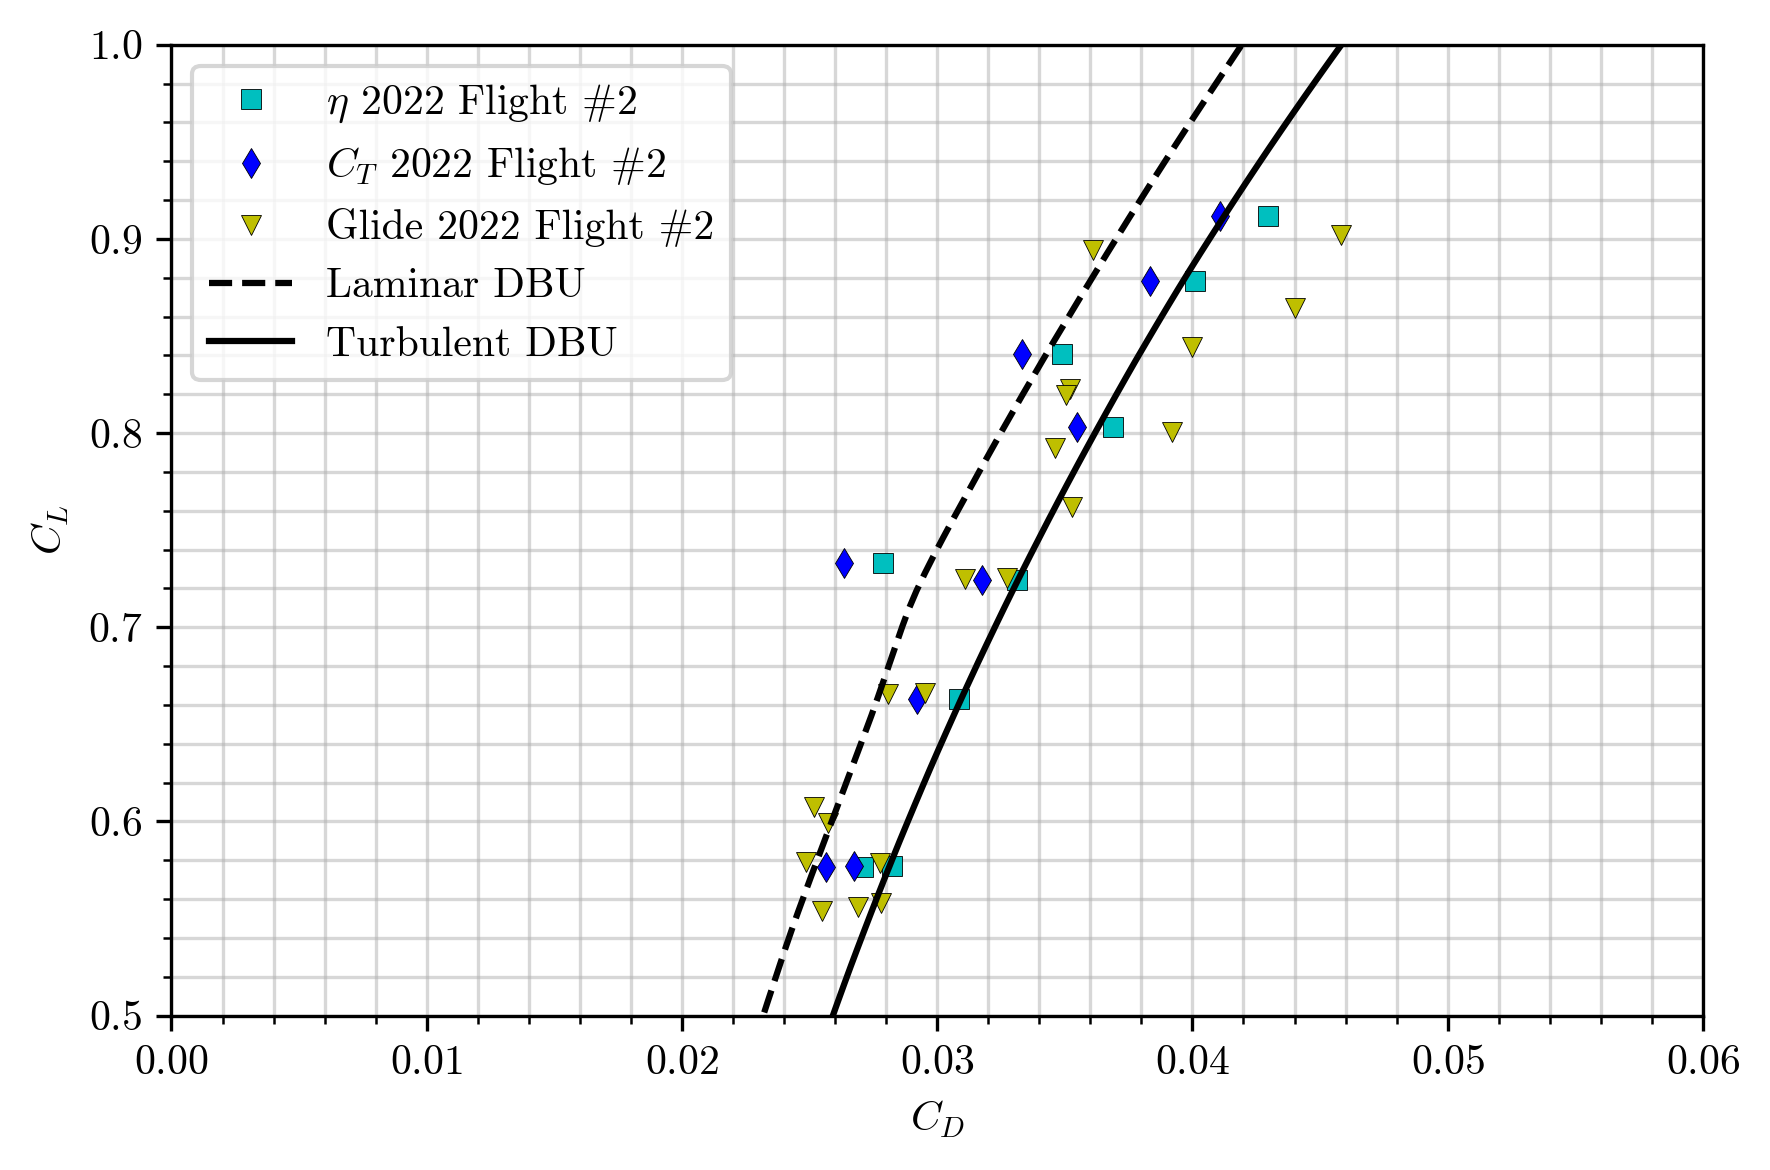

In [30]:
polar_glide_cruise_comparison_raw = plt.figure(dpi=300, figsize=(6,4))

plt.plot(eta_cruise_segresult_2022_06_15.ave_polar.CD, eta_cruise_segresult_2022_06_15.ave_polar.CL, marker='s', markersize=5, color='c', linestyle='', label="$\eta$ 2022 Flight #2")
plt.plot(ct_cruise_segresult_2022_06_15.ave_polar.CD, ct_cruise_segresult_2022_06_15.ave_polar.CL, marker='d', markersize=5, color='b', linestyle='', label="$C_T$ 2022 Flight #2")
plt.plot(glide_segresult_2022.ave_polar.CD, glide_segresult_2022.ave_polar.CL, marker='v', markersize=5, color='y', linestyle='', label="Glide 2022 Flight #2")

plt.plot(build_laminar.CD, build_laminar.CL, linestyle="--", marker="", color="black", label='Laminar DBU')
plt.plot(build_turbulent.CD, build_turbulent.CL, linestyle="solid", marker="", color="black", label='Turbulent DBU')

plt.legend(ncol=1, loc='upper left', fancybox=True)
plt.xlabel("$C_D$")
plt.ylabel("$C_L$")
plt.xlim([0, 0.06])
plt.ylim([0.5, 1.0])
plt.show()

main.save_figure(polar_glide_cruise_comparison_raw, f'{polar_glide_cruise_comparison_raw=}'.split('=')[0], figure_path, overwrite=True)

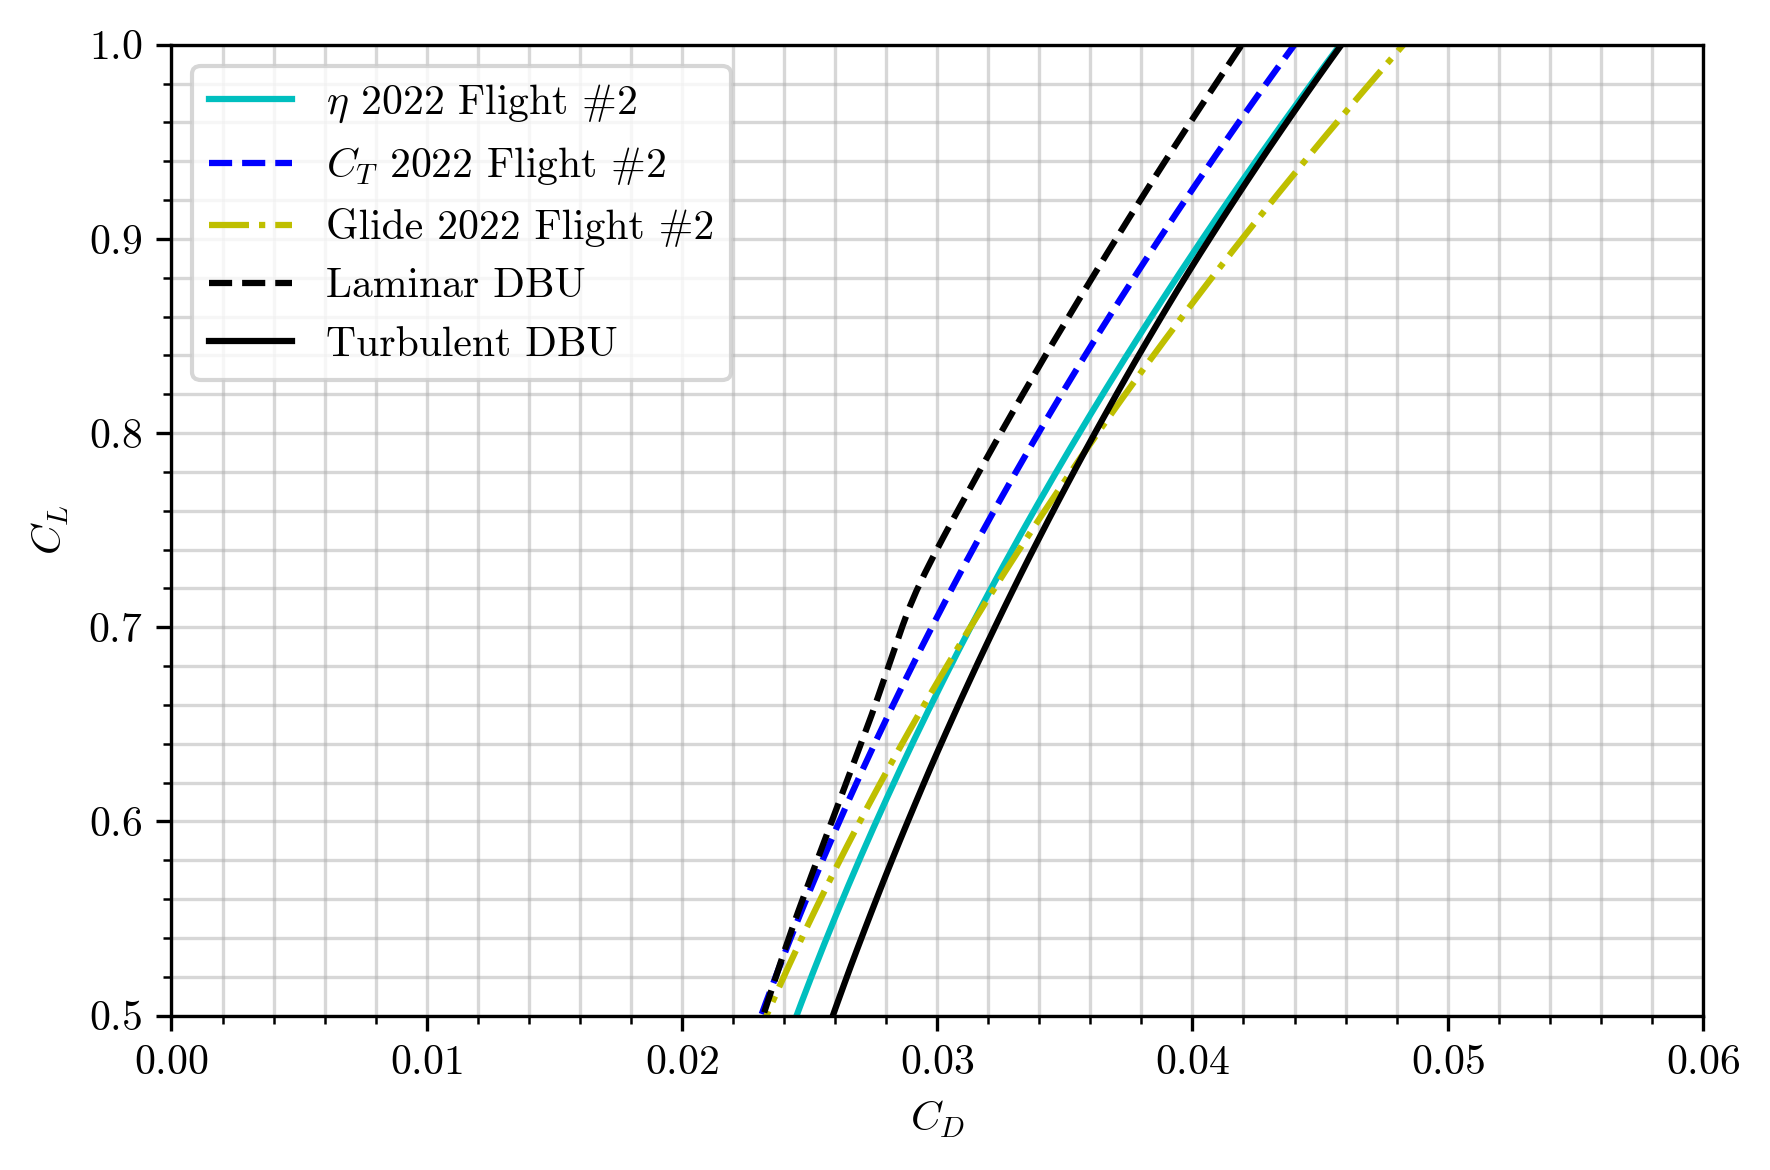

In [32]:
polar_glide_cruise_comparison_fit = plt.figure(dpi=300, figsize=(6,4))


plt.plot(cl_finders.plotfittedpolar(createv, eta_cruise_segresult_2022_06_15.fit_polar, [0.2, 1.2])[1], cl_finders.plotfittedpolar(createv, eta_cruise_segresult_2022_06_15.fit_polar, [0.2, 1.2])[0], marker='', markersize=5, color='c', linestyle='solid', label="$\eta$ 2022 Flight #2")
plt.plot(cl_finders.plotfittedpolar(createv, ct_cruise_segresult_2022_06_15.fit_polar, [0.2, 1.2])[1], cl_finders.plotfittedpolar(createv, ct_cruise_segresult_2022_06_15.fit_polar, [0.2, 1.2])[0], marker='', markersize=5, color='b', linestyle='dashed', label="$C_T$ 2022 Flight #2")
plt.plot(cl_finders.plotfittedpolar(createv, glide_segresult_2022.fit_polar, [0.2, 1.2])[1], cl_finders.plotfittedpolar(createv, glide_segresult_2022.fit_polar, [0.2, 1.2])[0], marker='', markersize=5, color='y', linestyle='-.', label="Glide 2022 Flight #2")

plt.plot(build_laminar.CD, build_laminar.CL, linestyle="--", marker="", color="black", label='Laminar DBU')
plt.plot(build_turbulent.CD, build_turbulent.CL, linestyle="solid", marker="", color="black", label='Turbulent DBU')

plt.legend(ncol=1, loc='upper left')
plt.xlabel("$C_D$")
plt.ylabel("$C_L$")
plt.xlim([0, 0.06])
plt.ylim([0.5, 1.0])
plt.show()
main.save_figure(polar_glide_cruise_comparison_fit, f'{polar_glide_cruise_comparison_fit=}'.split('=')[0], figure_path, overwrite=True)

0.8132420319247816
[0.01686866 0.80699438]
0.8212356028864357
[0.01867136 0.71998802]


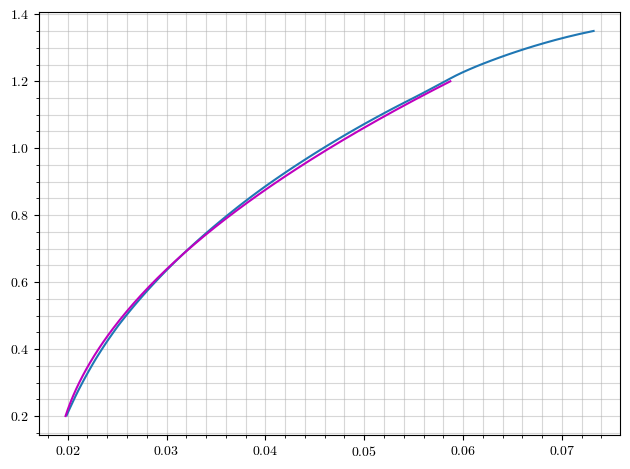

In [14]:
# Printing Drag Build Polar Results
polar = cl_finders.cd2polar(createv, build_laminar.CD, build_laminar.CL)
print(polar)

polar = cl_finders.cd2polar(createv, build_turbulent.CD, build_turbulent.CL)
print(polar)

[CL_bdu_fitted, CD_bdu_fitted] = cl_finders.plotfittedpolar(createv, polar, [0.2,1.2])

plt.figure()
plt.plot(build_turbulent.CD, build_turbulent.CL, linestyle='-', marker='')
plt.plot(CD_bdu_fitted, CL_bdu_fitted, linestyle='-', marker='', color='m')

In [15]:
# Printing Polar Fit Results

print(eta_cruise_segresult_2021.fit_polar[1])
print(ct_cruise_segresult_2021.fit_polar[1])

print(eta_cruise_segresult_2022_06_13.fit_polar[1])
print(ct_cruise_segresult_2022_06_13.fit_polar[1])

print(eta_cruise_segresult_2022_06_15.fit_polar[1])
print(ct_cruise_segresult_2022_06_15.fit_polar[1])

print(eta_cruise_segresult_2023.fit_polar[1])
print(ct_cruise_segresult_2023.fit_polar[1])

0.7320854462356375
0.8464750054858144
0.8999373148391993
1.0636702924324328
0.7049716993073848
0.7186918679097748
0.9121410586864562
0.9143111823365895


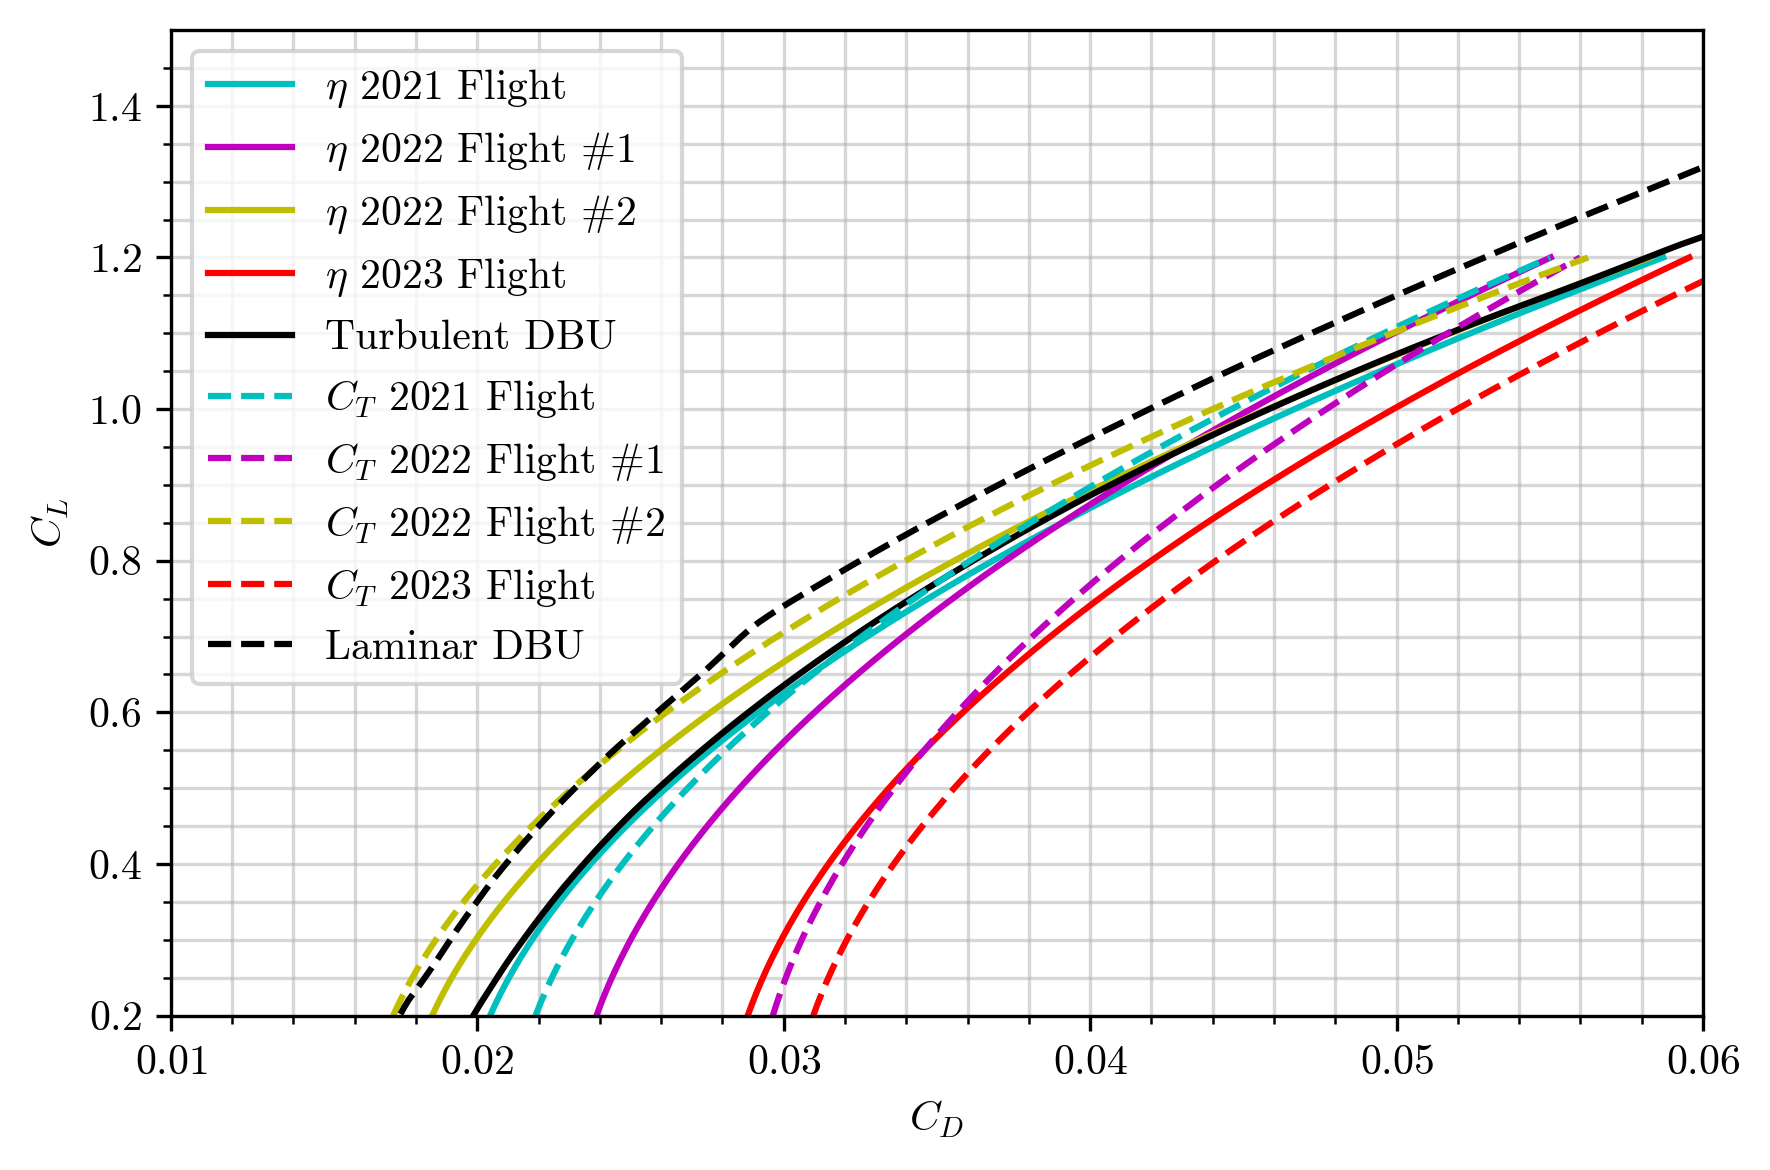

In [16]:
# Cruise Fitted Results
polar_cruise_comparison_fit = plt.figure(dpi=300, figsize=(6,4))

plt.plot(cl_finders.plotfittedpolar(createv, eta_cruise_segresult_2021.fit_polar, [0.2, 1.2])[1], cl_finders.plotfittedpolar(createv, eta_cruise_segresult_2021.fit_polar, [0.2, 1.2])[0], marker='', markersize=5, color='c', linestyle='solid', label="$\eta$ 2021 Flight")

plt.plot(cl_finders.plotfittedpolar(createv, eta_cruise_segresult_2022_06_13.fit_polar, [0.2, 1.2])[1], cl_finders.plotfittedpolar(createv, eta_cruise_segresult_2022_06_13.fit_polar, [0.2, 1.2])[0], marker='', markersize=5, color='m', linestyle='solid', label="$\eta$ 2022 Flight #1")

plt.plot(cl_finders.plotfittedpolar(createv, eta_cruise_segresult_2022_06_15.fit_polar, [0.2, 1.2])[1], cl_finders.plotfittedpolar(createv, eta_cruise_segresult_2022_06_15.fit_polar, [0.2, 1.2])[0], marker='', markersize=5, color='y', linestyle='solid', label="$\eta$ 2022 Flight #2")

plt.plot(cl_finders.plotfittedpolar(createv, eta_cruise_segresult_2023.fit_polar, [0.2, 1.2])[1], cl_finders.plotfittedpolar(createv, eta_cruise_segresult_2023.fit_polar, [0.2, 1.2])[0], marker='', markersize=5, color='r', linestyle='solid', label="$\eta$ 2023 Flight")

plt.plot(build_turbulent.CD, build_turbulent.CL, linestyle="solid", marker="", color="black", label='Turbulent DBU')

plt.plot(cl_finders.plotfittedpolar(createv, ct_cruise_segresult_2021.fit_polar, [0.2, 1.2])[1], cl_finders.plotfittedpolar(createv, ct_cruise_segresult_2021.fit_polar, [0.2, 1.2])[0], marker='', markersize=5, color='c', linestyle='dashed', label="$C_T$ 2021 Flight")

plt.plot(cl_finders.plotfittedpolar(createv, ct_cruise_segresult_2022_06_13.fit_polar, [0.2, 1.2])[1], cl_finders.plotfittedpolar(createv, ct_cruise_segresult_2022_06_13.fit_polar, [0.2, 1.2])[0], marker='', markersize=5, color='m', linestyle='dashed', label="$C_T$ 2022 Flight #1")

plt.plot(cl_finders.plotfittedpolar(createv, ct_cruise_segresult_2022_06_15.fit_polar, [0.2, 1.2])[1], cl_finders.plotfittedpolar(createv, ct_cruise_segresult_2022_06_15.fit_polar, [0.2, 1.2])[0], marker='', markersize=5, color='y', linestyle='dashed', label="$C_T$ 2022 Flight #2")

plt.plot(cl_finders.plotfittedpolar(createv, ct_cruise_segresult_2023.fit_polar, [0.2, 1.2])[1], cl_finders.plotfittedpolar(createv, ct_cruise_segresult_2023.fit_polar, [0.2, 1.2])[0], marker='', markersize=5, color='r', linestyle='dashed', label="$C_T$ 2023 Flight")

plt.plot(build_laminar.CD, build_laminar.CL, linestyle="--", marker="", color="black", label='Laminar DBU')

plt.legend(ncol=1, loc='upper left', fancybox=True)
plt.xlabel("$C_D$")
plt.ylabel("$C_L$")
plt.xlim([0.01, 0.06])
plt.ylim([0.2, 1.5])
plt.show()
main.save_figure(polar_cruise_comparison_fit, f'{polar_cruise_comparison_fit=}'.split('=')[0], figure_path, overwrite=True)

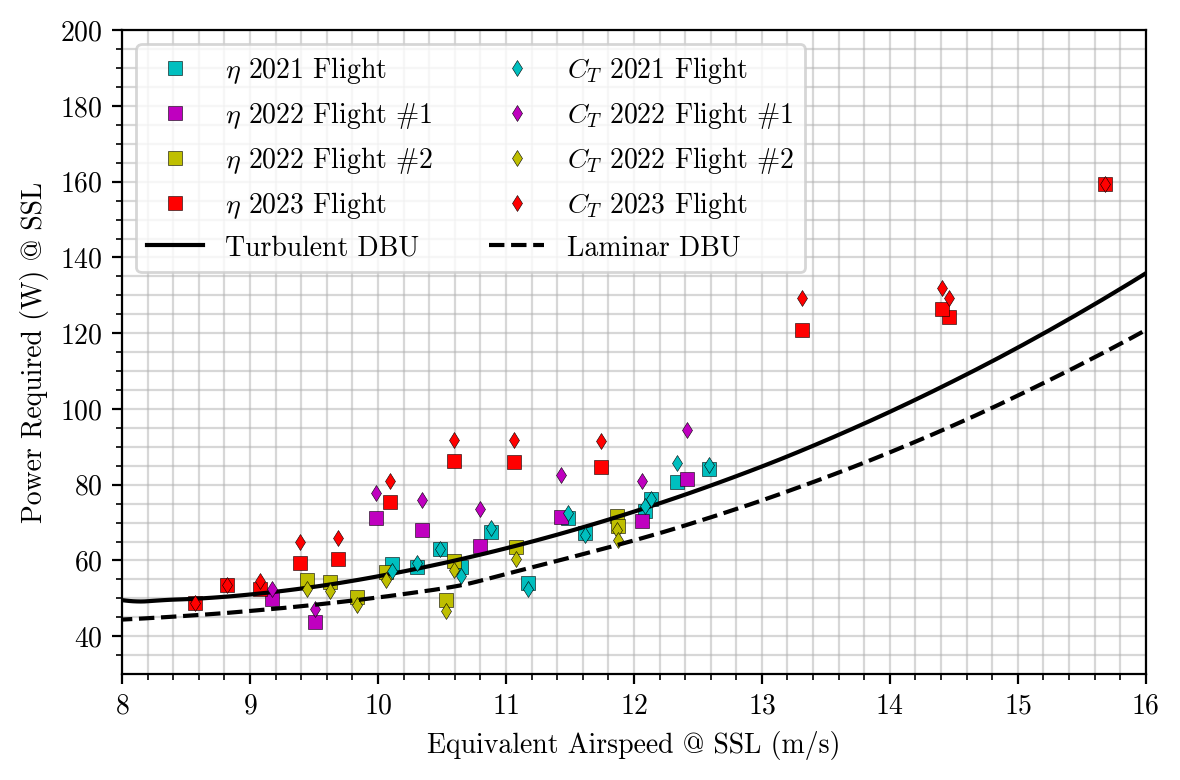

In [17]:
# Getting Power Required from CL, CD
[Preq_ct, EAS_ct] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2022_06_15.ave_polar.CL , ct_cruise_segresult_2022_06_15.ave_polar.CD)
[Preq_XFLR5_Turbulent, EAS_XFLR5_Turbulent] = cl_finders.rawpolar2preqew(createv, build_turbulent.CL, build_turbulent.CD)
[Preq_XFLR5_Laminar, EAS_XFLR5_Laminar] = cl_finders.rawpolar2preqew(createv, build_laminar.CL, build_laminar.CD)

# Plotting
preq_cruise_comparison_raw = plt.figure(dpi=200, figsize=(6,4))

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, eta_cruise_segresult_2021.ave_polar.CL , eta_cruise_segresult_2021.ave_polar.CD)
plt.plot(EAS, Preq, marker='s', markersize=5, color='c', linestyle='', label="$\eta$ 2021 Flight")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, eta_cruise_segresult_2022_06_13.ave_polar.CL , eta_cruise_segresult_2022_06_13.ave_polar.CD)
plt.plot(EAS, Preq, marker='s', markersize=5, color='m', linestyle='', label="$\eta$ 2022 Flight #1")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, eta_cruise_segresult_2022_06_15.ave_polar.CL , eta_cruise_segresult_2022_06_15.ave_polar.CD)
plt.plot(EAS, Preq, marker='s', markersize=5, color='y', linestyle='', label="$\eta$ 2022 Flight #2")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, eta_cruise_segresult_2023.ave_polar.CL , eta_cruise_segresult_2023.ave_polar.CD)
plt.plot(EAS, Preq, marker='s', markersize=5, color='r', linestyle='', label="$\eta$ 2023 Flight")

plt.plot(EAS_XFLR5_Turbulent, Preq_XFLR5_Turbulent, linestyle='solid', color='black', marker='', label='Turbulent DBU')

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2021.ave_polar.CL , ct_cruise_segresult_2021.ave_polar.CD)
plt.plot(EAS, Preq, linestyle='', marker='d', color='c', label="$C_T$ 2021 Flight")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2022_06_13.ave_polar.CL , ct_cruise_segresult_2022_06_13.ave_polar.CD)
plt.plot(EAS, Preq, linestyle='', marker='d', color='m', label="$C_T$ 2022 Flight #1")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2022_06_15.ave_polar.CL , ct_cruise_segresult_2022_06_15.ave_polar.CD)
plt.plot(EAS, Preq, linestyle='', marker='d', color='y', label="$C_T$ 2022 Flight #2")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2023.ave_polar.CL , ct_cruise_segresult_2023.ave_polar.CD)
plt.plot(EAS, Preq, linestyle='', marker='d', color='r', label="$C_T$ 2023 Flight")

plt.plot(EAS_XFLR5_Laminar, Preq_XFLR5_Laminar, linestyle='--', color='black', marker='', label='Laminar DBU')

plt.xlim([8, 16])
plt.ylim([30, 200])
plt.xlabel("Equivalent Airspeed @ SSL (m/s)")
plt.ylabel("Power Required (W) @ SSL")
plt.legend(ncol=2, loc='upper left', fancybox=True)
plt.show()
main.save_figure(preq_cruise_comparison_raw, f'{preq_cruise_comparison_raw=}'.split('=')[0], figure_path, overwrite=True)

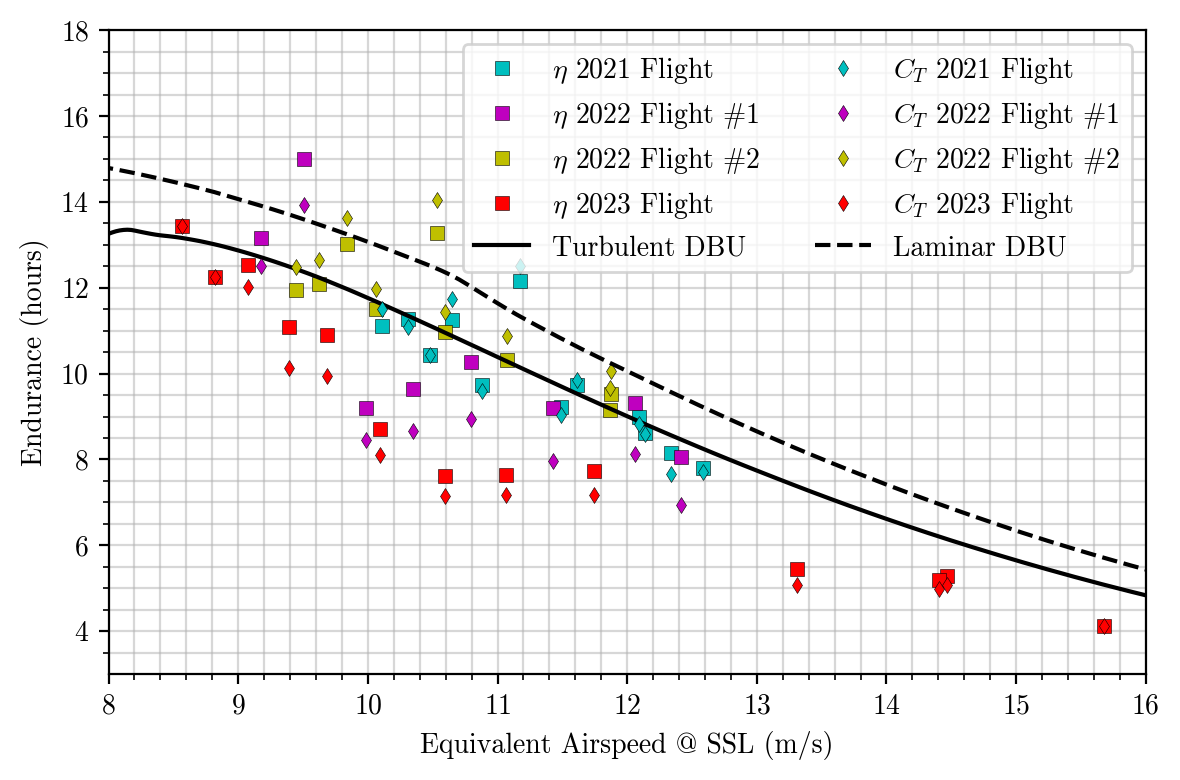

In [18]:
# Calculating Endurance for Raw Cruise

P_total = 1132 # Wh
efficiency= 0.58

# Getting Power Required from CL, CD
[Preq_ct, EAS_ct] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2022_06_15.ave_polar.CL , ct_cruise_segresult_2022_06_15.ave_polar.CD)
[Preq_XFLR5_Turbulent, EAS_XFLR5_Turbulent] = cl_finders.rawpolar2preqew(createv, build_turbulent.CL, build_turbulent.CD)
[Preq_XFLR5_Laminar, EAS_XFLR5_Laminar] = cl_finders.rawpolar2preqew(createv, build_laminar.CL, build_laminar.CD)

# Plotting
end_cruise_comparison_raw = plt.figure(dpi=200, figsize=(6,4))

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, eta_cruise_segresult_2021.ave_polar.CL , eta_cruise_segresult_2021.ave_polar.CD)
plt.plot(EAS, P_total/(Preq/efficiency), marker='s', markersize=5, color='c', linestyle='', label="$\eta$ 2021 Flight")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, eta_cruise_segresult_2022_06_13.ave_polar.CL , eta_cruise_segresult_2022_06_13.ave_polar.CD)
plt.plot(EAS, P_total/(Preq/efficiency), marker='s', markersize=5, color='m', linestyle='', label="$\eta$ 2022 Flight #1")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, eta_cruise_segresult_2022_06_15.ave_polar.CL , eta_cruise_segresult_2022_06_15.ave_polar.CD)
plt.plot(EAS, P_total/(Preq/efficiency), marker='s', markersize=5, color='y', linestyle='', label="$\eta$ 2022 Flight #2")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, eta_cruise_segresult_2023.ave_polar.CL , eta_cruise_segresult_2023.ave_polar.CD)
plt.plot(EAS, P_total/(Preq/efficiency), marker='s', markersize=5, color='r', linestyle='', label="$\eta$ 2023 Flight")

plt.plot(EAS_XFLR5_Turbulent, P_total/(Preq_XFLR5_Turbulent/efficiency), linestyle='solid', color='black', marker='', label='Turbulent DBU')

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2021.ave_polar.CL , ct_cruise_segresult_2021.ave_polar.CD)
plt.plot(EAS, P_total/(Preq/efficiency), linestyle='', marker='d', color='c', label="$C_T$ 2021 Flight")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2022_06_13.ave_polar.CL , ct_cruise_segresult_2022_06_13.ave_polar.CD)
plt.plot(EAS, P_total/(Preq/efficiency), linestyle='', marker='d', color='m', label="$C_T$ 2022 Flight #1")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2022_06_15.ave_polar.CL , ct_cruise_segresult_2022_06_15.ave_polar.CD)
plt.plot(EAS, P_total/(Preq/efficiency), linestyle='', marker='d', color='y', label="$C_T$ 2022 Flight #2")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2023.ave_polar.CL , ct_cruise_segresult_2023.ave_polar.CD)
plt.plot(EAS, P_total/(Preq/efficiency), linestyle='', marker='d', color='r', label="$C_T$ 2023 Flight")

plt.plot(EAS_XFLR5_Laminar, P_total/(Preq_XFLR5_Laminar/efficiency), linestyle='--', color='black', marker='', label='Laminar DBU')

plt.xlabel("Equivalent Airspeed @ SSL (m/s)")
plt.ylabel("Endurance (hours)")
plt.legend(ncol=2, loc='upper right', fancybox=True)
plt.xlim([8,16])
plt.ylim([3,18])
plt.show()
main.save_figure(end_cruise_comparison_raw, f'{end_cruise_comparison_raw=}'.split('=')[0], figure_path, overwrite=True)

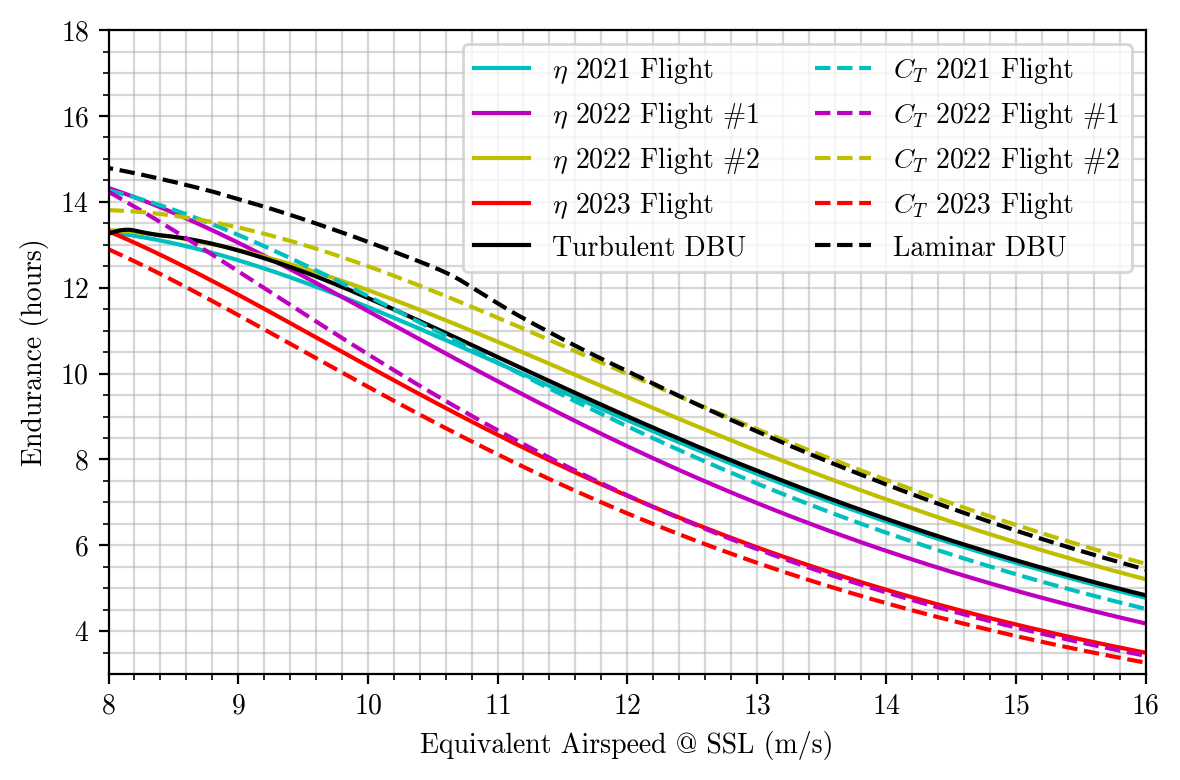

In [19]:
# Getting Power Required from Polars
[Preq_ct, EAS_ct] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2022_06_15.ave_polar.CL , ct_cruise_segresult_2022_06_15.ave_polar.CD)
[Preq_XFLR5_Turbulent, EAS_XFLR5_Turbulent] = cl_finders.rawpolar2preqew(createv, build_turbulent.CL, build_turbulent.CD)
[Preq_XFLR5_Laminar, EAS_XFLR5_Laminar] = cl_finders.rawpolar2preqew(createv, build_laminar.CL, build_laminar.CD)

# Plotting
end_cruise_comparison_fit = plt.figure(dpi=200, figsize=(6,4))

[Preq, EAS] = cl_finders.polar2preqew(createv, eta_cruise_segresult_2021.fit_polar, [8, 17], createvstandardweight=False)
plt.plot(EAS, P_total/(Preq/efficiency), marker='', markersize=5, color='c', linestyle='solid', label="$\eta$ 2021 Flight")

[Preq, EAS] = cl_finders.polar2preqew(createv, eta_cruise_segresult_2022_06_13.fit_polar, [8, 17], createvstandardweight=False)
plt.plot(EAS, P_total/(Preq/efficiency), marker='', markersize=5, color='m', linestyle='solid', label="$\eta$ 2022 Flight #1")

[Preq, EAS] = cl_finders.polar2preqew(createv, eta_cruise_segresult_2022_06_15.fit_polar, [8, 17], createvstandardweight=False)
plt.plot(EAS, P_total/(Preq/efficiency), marker='', markersize=5, color='y', linestyle='solid', label="$\eta$ 2022 Flight #2")

[Preq, EAS] = cl_finders.polar2preqew(createv, eta_cruise_segresult_2023.fit_polar, [8, 17], createvstandardweight=False)
plt.plot(EAS, P_total/(Preq/efficiency), marker='', markersize=5, color='r', linestyle='solid', label="$\eta$ 2023 Flight")

plt.plot(EAS_XFLR5_Turbulent, P_total/(Preq_XFLR5_Turbulent/efficiency), linestyle='solid', color='black', marker='', label='Turbulent DBU')

[Preq, EAS] = cl_finders.polar2preqew(createv, ct_cruise_segresult_2021.fit_polar, [8, 17], createvstandardweight=False)
plt.plot(EAS, P_total/(Preq/efficiency), marker='', color='c', linestyle='--', label="$C_T$ 2021 Flight")

[Preq, EAS] = cl_finders.polar2preqew(createv, ct_cruise_segresult_2022_06_13.fit_polar, [8, 17], createvstandardweight=False)
plt.plot(EAS, P_total/(Preq/efficiency), marker='', color='m', linestyle='--', label="$C_T$ 2022 Flight #1")

[Preq, EAS] = cl_finders.polar2preqew(createv, ct_cruise_segresult_2022_06_15.fit_polar, [8, 17], createvstandardweight=False)
plt.plot(EAS, P_total/(Preq/efficiency), marker='', color='y', linestyle='--', label="$C_T$ 2022 Flight #2")

[Preq, EAS] = cl_finders.polar2preqew(createv, ct_cruise_segresult_2023.fit_polar, [8, 17], createvstandardweight=False)
plt.plot(EAS, P_total/(Preq/efficiency), marker='', color='r', linestyle='--', label="$C_T$ 2023 Flight")

plt.plot(EAS_XFLR5_Laminar, P_total/(Preq_XFLR5_Laminar/efficiency), linestyle='--', color='black', marker='', label='Laminar DBU')

plt.xlabel("Equivalent Airspeed @ SSL (m/s)")
plt.ylabel("Endurance (hours)")
plt.legend(ncol=2, loc='best', fancybox=True)
plt.xlim([8,16])
plt.ylim([3,18])
plt.show()
main.save_figure(end_cruise_comparison_fit, f'{end_cruise_comparison_fit=}'.split('=')[0], figure_path, overwrite=True)

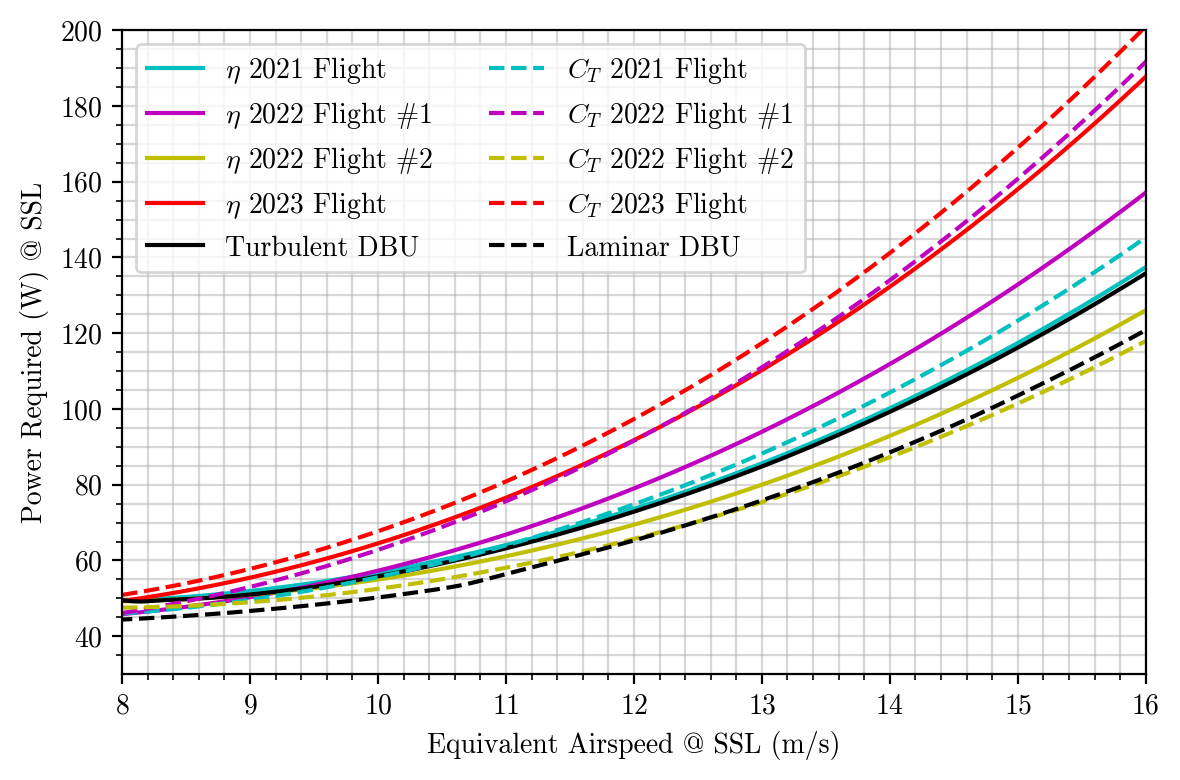

In [20]:
# Getting Power Required from Polars
[Preq_ct, EAS_ct] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2022_06_15.ave_polar.CL , ct_cruise_segresult_2022_06_15.ave_polar.CD)
[Preq_XFLR5_Turbulent, EAS_XFLR5_Turbulent] = cl_finders.rawpolar2preqew(createv, build_turbulent.CL, build_turbulent.CD)
[Preq_XFLR5_Laminar, EAS_XFLR5_Laminar] = cl_finders.rawpolar2preqew(createv, build_laminar.CL, build_laminar.CD)

# Plotting
preq_cruise_comparison_fit = plt.figure(dpi=200, figsize=(6,4))

[Preq, EAS] = cl_finders.polar2preqew(createv, eta_cruise_segresult_2021.fit_polar, [8, 17], createvstandardweight=False)
plt.plot(EAS, Preq, marker='', markersize=5, color='c', linestyle='solid', label="$\eta$ 2021 Flight")

[Preq, EAS] = cl_finders.polar2preqew(createv, eta_cruise_segresult_2022_06_13.fit_polar, [8, 17], createvstandardweight=False)
plt.plot(EAS, Preq, marker='', markersize=5, color='m', linestyle='solid', label="$\eta$ 2022 Flight #1")

[Preq, EAS] = cl_finders.polar2preqew(createv, eta_cruise_segresult_2022_06_15.fit_polar, [8, 17], createvstandardweight=False)
plt.plot(EAS, Preq, marker='', markersize=5, color='y', linestyle='solid', label="$\eta$ 2022 Flight #2")

[Preq, EAS] = cl_finders.polar2preqew(createv, eta_cruise_segresult_2023.fit_polar, [8, 17], createvstandardweight=False)
plt.plot(EAS, Preq, marker='', markersize=5, color='r', linestyle='solid', label="$\eta$ 2023 Flight")

plt.plot(EAS_XFLR5_Turbulent, Preq_XFLR5_Turbulent, linestyle='solid', color='black', marker='', label='Turbulent DBU')

[Preq, EAS] = cl_finders.polar2preqew(createv, ct_cruise_segresult_2021.fit_polar, [8, 17], createvstandardweight=False)
plt.plot(EAS, Preq, marker='', color='c', linestyle='--', label="$C_T$ 2021 Flight")

[Preq, EAS] = cl_finders.polar2preqew(createv, ct_cruise_segresult_2022_06_13.fit_polar, [8, 17], createvstandardweight=False)
plt.plot(EAS, Preq, marker='', color='m', linestyle='--', label="$C_T$ 2022 Flight #1")

[Preq, EAS] = cl_finders.polar2preqew(createv, ct_cruise_segresult_2022_06_15.fit_polar, [8, 17], createvstandardweight=False)
plt.plot(EAS, Preq, marker='', color='y', linestyle='--', label="$C_T$ 2022 Flight #2")

[Preq, EAS] = cl_finders.polar2preqew(createv, ct_cruise_segresult_2023.fit_polar, [8, 17], createvstandardweight=False)
plt.plot(EAS, Preq, marker='', color='r', linestyle='--', label="$C_T$ 2023 Flight")

plt.plot(EAS_XFLR5_Laminar, Preq_XFLR5_Laminar, linestyle='--', color='black', marker='', label='Laminar DBU')

plt.xlim([8, 16])
plt.ylim([30, 200])
plt.xlabel("Equivalent Airspeed @ SSL (m/s)")
plt.ylabel("Power Required (W) @ SSL")
plt.legend(ncol=2, loc='upper left', fancybox=True)
plt.show()
main.save_figure(preq_cruise_comparison_fit, f'{preq_cruise_comparison_fit=}'.split('=')[0], figure_path, overwrite=True)

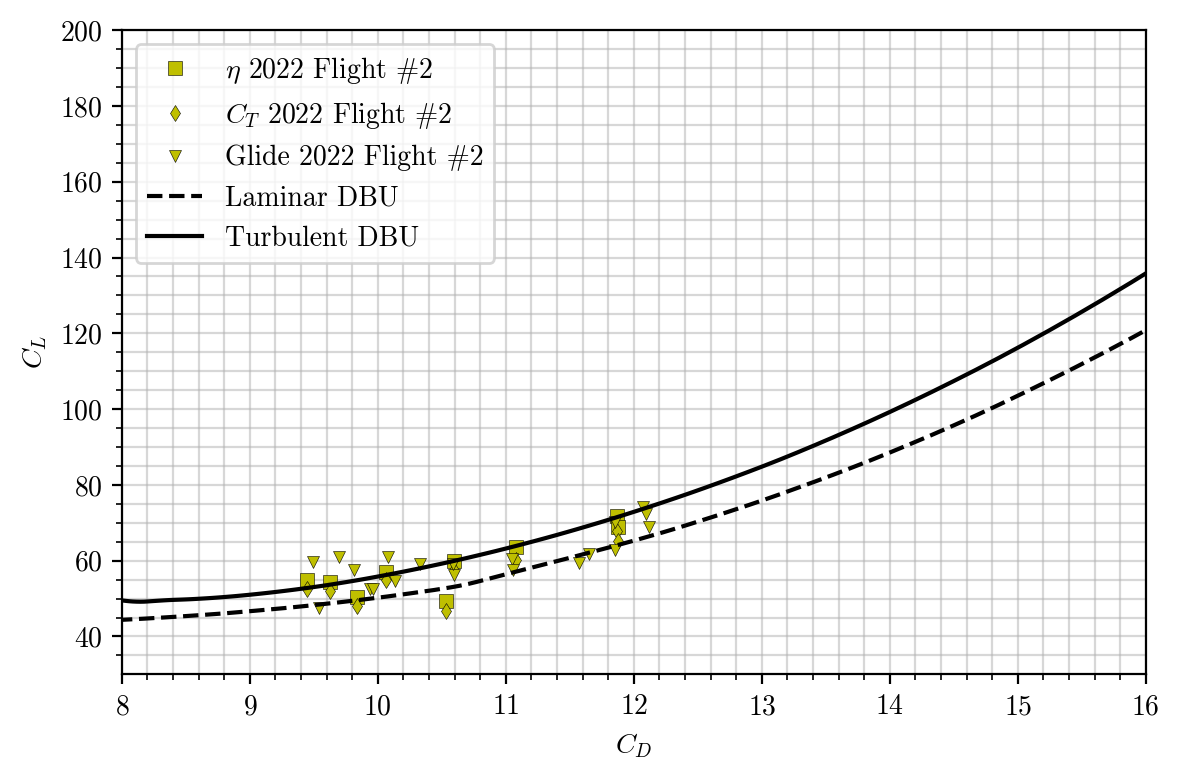

In [21]:
preq_glide_cruise_comparison_raw = plt.figure(dpi=200, figsize=(6,4))

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, eta_cruise_segresult_2022_06_15.ave_polar.CL , eta_cruise_segresult_2022_06_15.ave_polar.CD)
plt.plot(EAS, Preq, marker='s', markersize=5, color='y', linestyle='', label="$\eta$ 2022 Flight #2")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2022_06_15.ave_polar.CL , ct_cruise_segresult_2022_06_15.ave_polar.CD)
plt.plot(EAS, Preq, linestyle='', marker='d', color='y', label="$C_T$ 2022 Flight #2")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, glide_segresult_2022.ave_polar.CL , glide_segresult_2022.ave_polar.CD)
plt.plot(EAS, Preq, linestyle='', marker='v', color='y', label="Glide 2022 Flight #2")

plt.plot(EAS_XFLR5_Laminar, Preq_XFLR5_Laminar, linestyle='--', color='black', marker='', label='Laminar DBU')
plt.plot(EAS_XFLR5_Turbulent, Preq_XFLR5_Turbulent, linestyle='solid', color='black', marker='', label='Turbulent DBU')

plt.legend(ncol=1, loc='upper left', fancybox=True)
plt.xlabel("$C_D$")
plt.ylabel("$C_L$")
plt.xlim([8, 16])
plt.ylim([30, 200])
plt.show()

main.save_figure(preq_glide_cruise_comparison_raw, f'{preq_glide_cruise_comparison_raw=}'.split('=')[0], figure_path, overwrite=True)

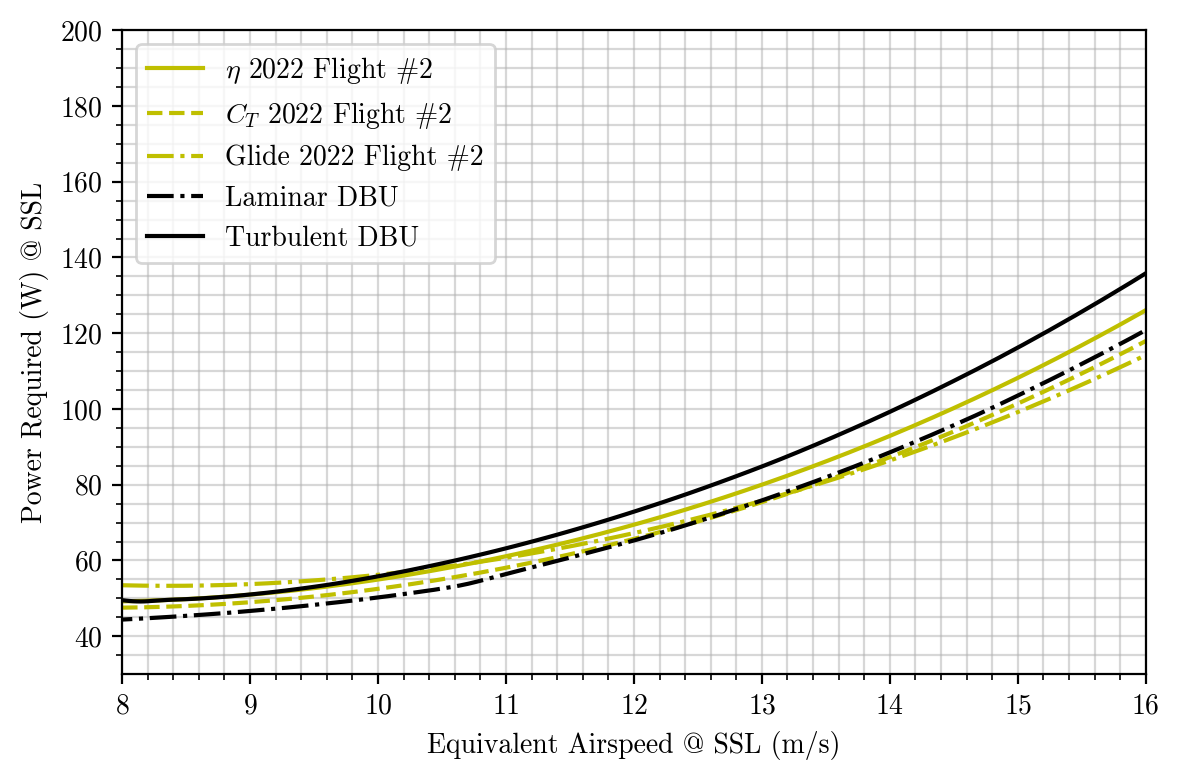

In [22]:
# Getting Power Required from Polars
[Preq_ct, EAS_ct] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2022_06_15.ave_polar.CL , ct_cruise_segresult_2022_06_15.ave_polar.CD)
[Preq_XFLR5_Turbulent, EAS_XFLR5_Turbulent] = cl_finders.rawpolar2preqew(createv, build_turbulent.CL, build_turbulent.CD)
[Preq_XFLR5_Laminar, EAS_XFLR5_Laminar] = cl_finders.rawpolar2preqew(createv, build_laminar.CL, build_laminar.CD)

# Plotting
preq_cruise_glide_comparison_fit = plt.figure(dpi=200, figsize=(6,4))

[Preq, EAS] = cl_finders.polar2preqew(createv, eta_cruise_segresult_2022_06_15.fit_polar, [8, 17], createvstandardweight=False)
plt.plot(EAS, Preq, marker='', markersize=5, color='y', linestyle='solid', label="$\eta$ 2022 Flight #2")

[Preq, EAS] = cl_finders.polar2preqew(createv, ct_cruise_segresult_2022_06_15.fit_polar, [8, 17], createvstandardweight=False)
plt.plot(EAS, Preq, marker='', color='y', linestyle='--', label="$C_T$ 2022 Flight #2")

[Preq, EAS] = cl_finders.polar2preqew(createv, glide_segresult_2022.fit_polar, [8, 17], createvstandardweight=False)
plt.plot(EAS, Preq, marker='', color='y', linestyle='-.', label="Glide 2022 Flight #2")

plt.plot(EAS_XFLR5_Laminar, Preq_XFLR5_Laminar, linestyle='-.', color='black', marker='', label='Laminar DBU')
plt.plot(EAS_XFLR5_Turbulent, Preq_XFLR5_Turbulent, linestyle='solid', color='black', marker='', label='Turbulent DBU')

plt.xlim([8, 16])
plt.ylim([30, 200])
plt.xlabel("Equivalent Airspeed @ SSL (m/s)")
plt.ylabel("Power Required (W) @ SSL")
plt.legend(ncol=1, loc='upper left', fancybox=True)
plt.show()
main.save_figure(preq_cruise_glide_comparison_fit, f'{preq_cruise_glide_comparison_fit=}'.split('=')[0], figure_path, overwrite=True)

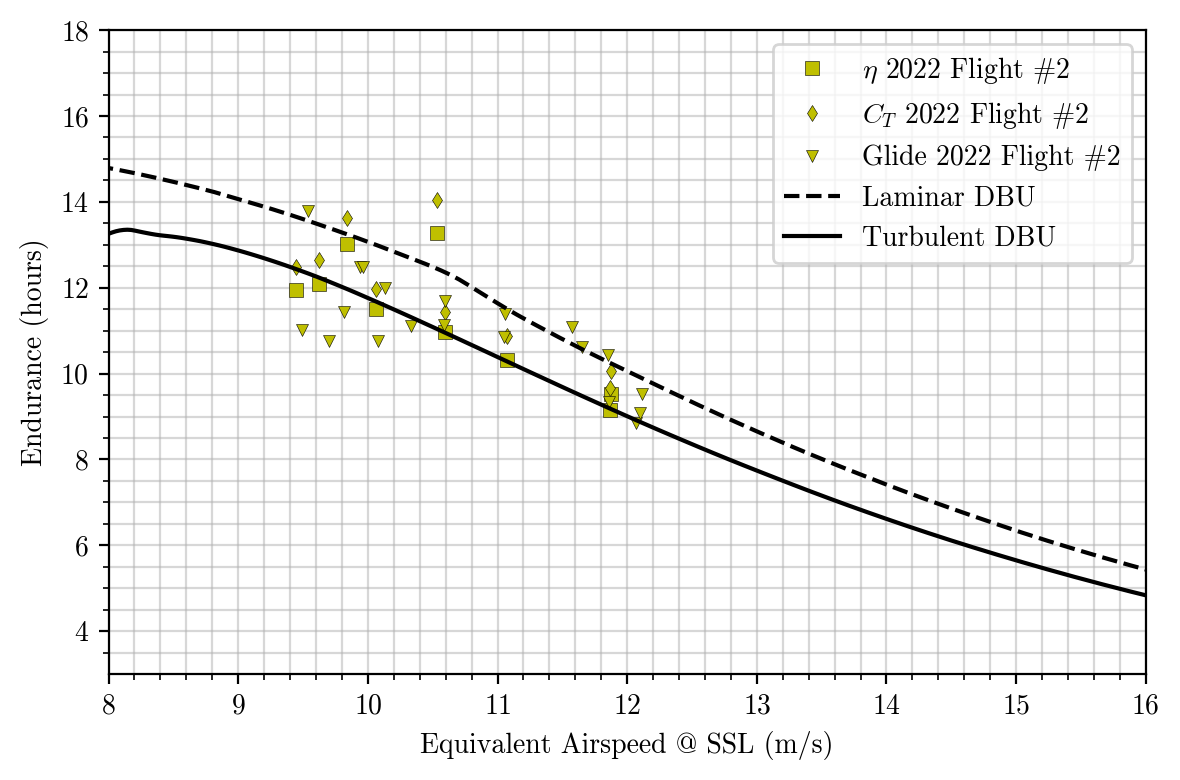

In [23]:
end_glide_cruise_comparison_raw = plt.figure(dpi=200, figsize=(6,4))

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, eta_cruise_segresult_2022_06_15.ave_polar.CL , eta_cruise_segresult_2022_06_15.ave_polar.CD)
plt.plot(EAS, P_total/(Preq/efficiency), marker='s', markersize=5, color='y', linestyle='', label="$\eta$ 2022 Flight #2")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2022_06_15.ave_polar.CL , ct_cruise_segresult_2022_06_15.ave_polar.CD)
plt.plot(EAS, P_total/(Preq/efficiency), linestyle='', marker='d', color='y', label="$C_T$ 2022 Flight #2")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, glide_segresult_2022.ave_polar.CL , glide_segresult_2022.ave_polar.CD)
plt.plot(EAS, P_total/(Preq/efficiency), linestyle='', marker='v', color='y', label="Glide 2022 Flight #2")

plt.plot(EAS_XFLR5_Laminar, P_total/(Preq_XFLR5_Laminar/efficiency), linestyle='--', color='black', marker='', label='Laminar DBU')
plt.plot(EAS_XFLR5_Turbulent, P_total/(Preq_XFLR5_Turbulent/efficiency), linestyle='solid', color='black', marker='', label='Turbulent DBU')

plt.legend(ncol=1, loc='best', fancybox=True)
plt.xlabel("Equivalent Airspeed @ SSL (m/s)")
plt.ylabel("Endurance (hours)")
plt.xlim([8,16])
plt.ylim([3,18])
plt.show()

main.save_figure(end_glide_cruise_comparison_raw, f'{end_glide_cruise_comparison_raw=}'.split('=')[0], figure_path, overwrite=True)

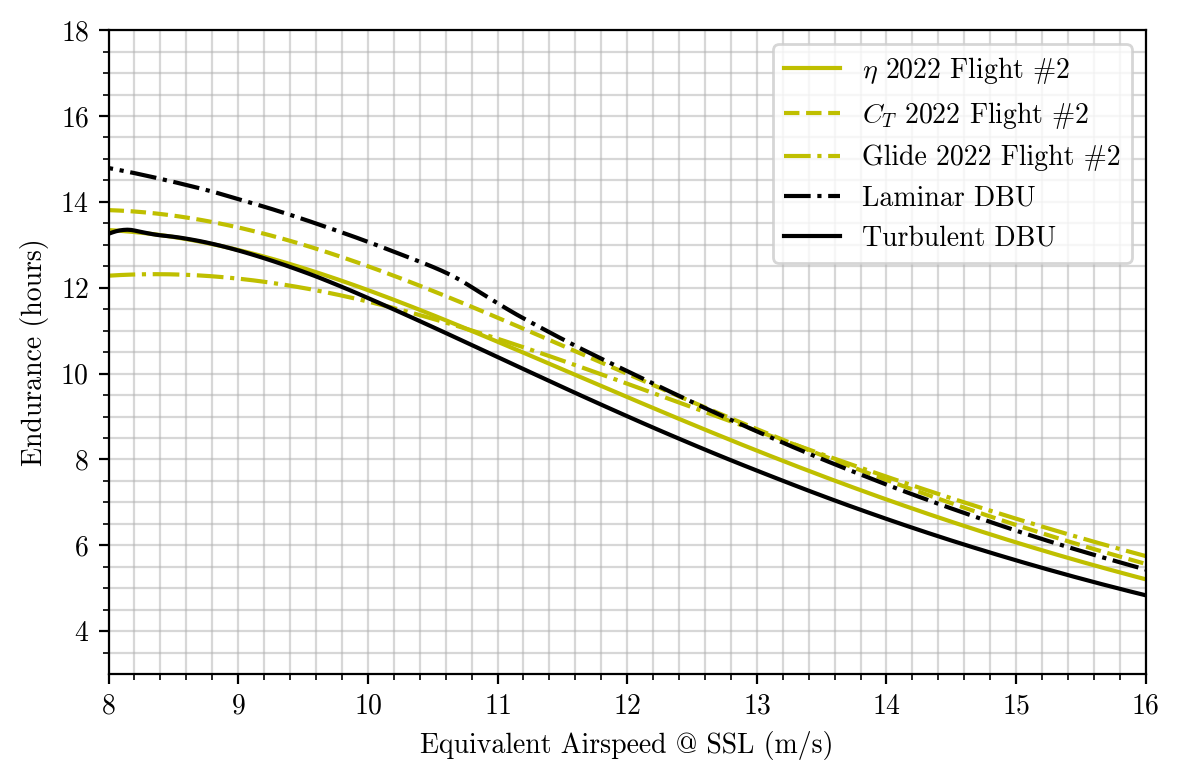

In [24]:
# Getting Power Required from Polars
[Preq_ct, EAS_ct] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2022_06_15.ave_polar.CL , ct_cruise_segresult_2022_06_15.ave_polar.CD)
[Preq_XFLR5_Turbulent, EAS_XFLR5_Turbulent] = cl_finders.rawpolar2preqew(createv, build_turbulent.CL, build_turbulent.CD)
[Preq_XFLR5_Laminar, EAS_XFLR5_Laminar] = cl_finders.rawpolar2preqew(createv, build_laminar.CL, build_laminar.CD)

# Plotting
end_cruise_glide_comparison_fit = plt.figure(dpi=200, figsize=(6,4))

[Preq, EAS] = cl_finders.polar2preqew(createv, eta_cruise_segresult_2022_06_15.fit_polar, [8, 17], createvstandardweight=False)
plt.plot(EAS, P_total/(Preq/efficiency), marker='', markersize=5, color='y', linestyle='solid', label="$\eta$ 2022 Flight #2")

[Preq, EAS] = cl_finders.polar2preqew(createv, ct_cruise_segresult_2022_06_15.fit_polar, [8, 17], createvstandardweight=False)
plt.plot(EAS, P_total/(Preq/efficiency), marker='', color='y', linestyle='--', label="$C_T$ 2022 Flight #2")

[Preq, EAS] = cl_finders.polar2preqew(createv, glide_segresult_2022.fit_polar, [8, 17], createvstandardweight=False)
plt.plot(EAS, P_total/(Preq/efficiency), marker='', color='y', linestyle='-.', label="Glide 2022 Flight #2")

plt.plot(EAS_XFLR5_Laminar, P_total/(Preq_XFLR5_Laminar/efficiency), linestyle='-.', color='black', marker='', label='Laminar DBU')
plt.plot(EAS_XFLR5_Turbulent, P_total/(Preq_XFLR5_Turbulent/efficiency), linestyle='solid', color='black', marker='', label='Turbulent DBU')

plt.legend(ncol=1, loc='best', fancybox=True)
plt.xlabel("Equivalent Airspeed @ SSL (m/s)")
plt.ylabel("Endurance (hours)")
plt.xlim([8,16])
plt.ylim([3,18])
plt.show()

main.save_figure(end_cruise_glide_comparison_fit, f'{end_cruise_glide_comparison_fit=}'.split('=')[0], figure_path, overwrite=True)